<a href="https://colab.research.google.com/github/SUNIDHI-SINGH/SUNIDHI-SINGH/blob/main/Graph_Decoarseningl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install deeprobust
# !conda install pytorch torchvision torchaudio -c pytorch
import torch
# print(torch.__version__)
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-geometric
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.generators.community import stochastic_block_model
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.generators.community import random_partition_graph

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import math
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import FactorAnalysis

import random



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=4d604fafe2e8e2a87ac742797612e754e613f4b36ad4eb3f979438cf7e163ff0
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


# New Section

In [ ]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import Tensor
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
from torch_geometric.datasets import FakeDataset
import networkx as nx
from networkx.algorithms import community
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

In [ ]:
import numpy
import torch
%load_ext autoreload
%autoreload 2

%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))



from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.generators.community import stochastic_block_model
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.generators.community import random_partition_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import math
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from random import sample

In [ ]:
# from deeprobust.graph.data import Dataset

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse import csgraph
from scipy.sparse.linalg import inv

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
dataset = FakeDataset

In [ ]:
from torch_geometric.datasets import WebKB
from torch_geometric.utils import to_dense_adj,homophily
dataset = WebKB(root='/texas',name='texas')
# dataset = Planetoid(root=data_dir,name='Chameleon')
# dataset = WebKB(root='/wisconsin',name='wisconsin')
# dataset = WebKB(root='/texas',name='cornell')
# dataset = Planetoid(root=data_dir, name='Cora')
# dataset = Planetoid(root=data_dir, name='Citeseer')
# dataset = Planetoid(root=data_dir, name='PubMed')
dataset

Processing...
Done!


texas()

In [ ]:
# Get some basic info about the dataset
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(50*'=')

# There is only one graph in the dataset, use it as new data object
data = dataset[0]

# Gather some statistics about the graph.
print(data)
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Is undirected: {data.is_undirected()}')

Number of graphs: 1
Number of features: 1703
Number of classes: 5
Data(x=[183, 1703], edge_index=[2, 325], y=[183], train_mask=[183, 10], val_mask=[183, 10], test_mask=[183, 10])
Number of nodes: 183
Number of edges: 325
Number of training nodes: 870
Training node label rate: 4.75
Is undirected: False


In [ ]:
dataset = FakeDataset(10, 5, 2)

# Access the first graph
data = dataset[0]


# Print the node feature matrix
print(data.x)

# Print the target/class labels
print(data.y)

# Print the graph connectivity
print(data.edge_index)

# Print the edge feature matrix (if available)
print(data.edge_attr)

# Print the node positions (if available)
print(data.pos)

tensor([[4.9706, 4.8172, 5.3413, 3.0459, 2.5239, 5.1678, 4.6249, 3.2107, 3.1582,
         4.6215, 3.1701, 3.3394, 4.5253, 3.7759, 3.0933, 5.0076, 3.2993, 3.1690,
         3.6842, 4.5549, 4.0237, 3.6555, 1.9031, 4.8659, 2.6957, 5.0641, 4.3776,
         2.9696, 4.4360, 5.9891, 3.5306, 3.2260, 2.1526, 4.0894, 3.5406, 5.0176,
         1.8970, 3.6546, 3.5148, 5.6126, 4.7229, 3.1397, 2.7053, 3.3180, 3.2423,
         2.3564, 4.4631, 4.1123, 3.8853, 4.5976, 4.6478, 4.0954, 4.0009, 5.2671,
         4.2866, 3.0533, 3.8151, 2.2994, 3.8013, 4.1758, 3.7004, 4.7139, 4.5835,
         4.4653],
        [3.0589, 3.2912, 3.2824, 2.8698, 1.7725, 4.0757, 5.6074, 3.0447, 3.6976,
         3.5209, 5.7329, 4.9947, 3.7921, 3.5822, 3.3234, 3.5011, 5.5541, 2.1929,
         3.8361, 4.1068, 1.6384, 3.5759, 3.3734, 4.1502, 3.9426, 4.0211, 3.5295,
         3.8533, 2.9754, 4.4090, 3.4129, 6.0655, 4.4984, 3.9999, 2.2933, 3.8185,
         2.7344, 5.2545, 5.2012, 3.4763, 4.0483, 4.2588, 2.7958, 3.7360, 5.0943,
         3

In [ ]:
dataset.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
from torch_geometric.datasets import WebKB
from torch_geometric.utils import to_dense_adj,homophily


# dataset = WebKB(root='/Texas',name='Texas')
# print(dataset[0])

edge_list = dataset[0].edge_index
NO_OF_EDGES = edge_list.shape[1]
labels = dataset[0].y
print(labels.shape)
# print("Homophilic ratio : " + str(homophily(edge_list,labels,method='edge')))


adj = to_dense_adj(dataset[0].edge_index)
adj = adj[0]

labels = labels.numpy()

X = dataset[0].x
X = X.to_dense()
N = X.shape[0]
NO_OF_CLASSES = dataset.num_classes

sparsity_original = 2*NO_OF_EDGES/(N*(N-1))
print("Sparsity of original graph : " + str(sparsity_original))


print(X.shape, adj.shape)

nn = int(1*N)
X = X[:nn,:]
adj = adj[:nn,:nn]
labels = labels[:nn]
print(X.shape,adj.shape)
print("labels",labels.shape)
# plot_graph(dataset[0])


torch.Size([1])
Sparsity of original graph : 0.9333333333333333
torch.Size([6, 64]) torch.Size([6, 6])
torch.Size([6, 64]) torch.Size([6, 6])
labels (1,)


In [ ]:
X.shape

torch.Size([6, 64])

In [ ]:
def get_laplacian(adj):
    b=torch.ones(adj.shape[0])
    return torch.diag(adj@b)-adj

theta = get_laplacian(adj)
print(theta.shape)


torch.Size([6, 6])


In [ ]:
# dataset_name = 'flickr'

# data = Dataset(root='', name=dataset_name, setting='gcn',seed=10)

# adj, features, labels = data.adj, data.features, data.labels
# idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test

# theta = csgraph.laplacian(adj).tocsr()
features = X.numpy()
NO_OF_NODES = X.shape[0]
# NO_OF_CLASSES =  7


print(NO_OF_CLASSES,NO_OF_NODES)

8 6


In [ ]:
def convertScipyToTensor(coo):
  try:
    coo = coo.tocoo()
  except:
    coo = coo
  values = coo.data
  indices = np.vstack((coo.row, coo.col))

  i = torch.LongTensor(indices)
  v = torch.FloatTensor(values)
  shape = coo.shape

  return torch.sparse.FloatTensor(i, v, torch.Size(shape))

In [ ]:
from scipy.sparse import random
from scipy.sparse.linalg import norm
from scipy.sparse import csr_matrix

p = X.shape[0]
k = int(p*0.5)
n = X.shape[1]
lambda_param = 100
beta_param = 50
alpha_param = 100
gamma_param = 100
lr = 1e-5
thresh = 1e-10

from scipy.sparse import random
from scipy.stats import rv_continuous
class CustomDistribution(rv_continuous):
    def _rvs(self,  size=None, random_state=None):
        return random_state.standard_normal(size)
temp = CustomDistribution(seed=1)
temp2 = temp()  # get a frozen version of the distribution
X_tilde = random(k, n, density=0.25, random_state=1, data_rvs=temp2.rvs)
C = random(p, k, density=0.25, random_state=1, data_rvs=temp2.rvs)
P = random(k, p, density=0.25, random_state=1, data_rvs=temp2.rvs)



In [ ]:
def experiment(lambda_param,beta_param,alpha_param,gamma_param,C,X_tilde,theta,X):
      p = X.shape[0]
      k = int(p*0.5)
      n = X.shape[1]
      ones = csr_matrix(np.ones((k,k)))
      ones = convertScipyToTensor(ones)
      ones = ones.to_dense()
      J = np.outer(np.ones(k), np.ones(k))/k
      J = csr_matrix(J)
      J = convertScipyToTensor(J)
      J = J.to_dense()
      zeros = csr_matrix(np.zeros((p,k)))
      zeros = convertScipyToTensor(zeros)
      zeros = zeros.to_dense()
      X_tilde = convertScipyToTensor(X_tilde)
      X_tilde = X_tilde.to_dense()
      C = convertScipyToTensor(C)
      C = C.to_dense()
      eye = torch.eye(k)
      try:
        theta = convertScipyToTensor(theta)
      except:
        theta = theta
      try:
        X = convertScipyToTensor(X)
        X = X.to_dense()
      except:
        X = X

      # if(torch.cuda.is_available()):
      #   # print("yes")
      #   X_tilde = X_tilde.cuda()
      #   C = C.cuda()
      #   theta = theta.cuda()
      #   X = X.cuda()
      #   J = J.cuda()
      #   zeros = zeros.cuda()
      #   ones = ones.cuda()
      #   eye = eye.cuda()

      def update(X_tilde,C,i):
          global L
          thetaC = theta@C
          CT = torch.transpose(C,0,1)
          X_tildeT = torch.transpose(X_tilde,0,1)
          CX_tilde = C@X_tilde
          t1 = CT@thetaC + J
          term_bracket = torch.linalg.pinv(t1)
          thetacX_tilde = thetaC@(X_tilde)

          L = 1/k

          t1 = -2*gamma_param*(thetaC@term_bracket)
          t2 = alpha_param*(CX_tilde-X)@(X_tildeT)
          t3 = 2*thetacX_tilde@(X_tildeT)
          t4 = lambda_param*(C@ones)
          t5 = 2*beta_param*(thetaC@CT@thetaC)
          T2 = (t1+t2+t3+t4+t5)/L
          Cnew = (C-T2).maximum(zeros)
          t1 = CT@thetaC*(2/alpha_param)
          t2 = CT@C
          t1 = torch.linalg.pinv(t1+t2)
          t1 = t1@CT
          t1 = t1@X
          X_tilde_new = t1
          Cnew[Cnew<thresh] = thresh
          for i in range(len(Cnew)):
              Cnew[i] = Cnew[i]/torch.linalg.norm(Cnew[i],1)
          for i in range(len(X_tilde_new)):
              X_tilde_new[i] = X_tilde_new[i]/torch.linalg.norm(X_tilde_new[i],1)
          return X_tilde_new,Cnew


      for i in tqdm(range(20)):
          X_tilde,C = update(X_tilde,C,i)

      return X_tilde,C



In [ ]:
def liftedexperiment(lambda_param,beta_param,alpha_param,gamma_param,P,Xd,theta_c,X_tilde):
      p = Xd.shape[0]
      # k = int(p*0.5)
      n = Xd.shape[1]

      ones = csr_matrix(np.ones((p,p)))
      ones = convertScipyToTensor(ones)
      ones = ones.to_dense()
      oness = csr_matrix(np.ones((k,p)))
      oness = convertScipyToTensor(oness)
      oness = oness.to_dense()
      J = np.outer(np.ones(p), np.ones(p))/p
      J = csr_matrix(J)
      J = convertScipyToTensor(J)
      J = J.to_dense()
      zeros = csr_matrix(np.zeros((p,k)))
      zeros = convertScipyToTensor(zeros)
      zeros = zeros

      # X_tilde = X_tilde

      # P = P
      eye = torch.eye(k)
      # try:
      #   theta = convertScipyToTensor(theta)
      # except:
      #   theta = theta
      # try:
      #   X = convertScipyToTensor(X)
      #   X = X.to_dense()
      # except:
      #   X = X



      def update(X,P,i):

          global L
          # print("Susi")
          theta_cP = theta_c@P #resultant will be k*p
          # print("Susi")
          PT = torch.transpose(P,0,1)
          XT = torch.transpose(Xd,0,1)
          PX = P@X
          t1 = PT@theta_cP + J #
          term_bracket = torch.linalg.pinv(t1)
          theta_cX = theta_cP@(X) # k*n

          L = 1/p

          t1 = -2*gamma_param*(theta_cP@term_bracket) #k*p  ----confused
          t2 = alpha_param*(PX-X_tilde)@(XT) #k*p
          t3 = 2*theta_cX@(XT) #k*p
          t4 = lambda_param*(P@ones) #k*p
          # t5 = 2*beta_param*(theta_cP@PT@theta_cP) #k*p
          # t6 = alpha_param*(theta_cP)@(PT@theta_cP)
          # t6 = lambda_param*(oness)
          T2 = (t1+t2+t3+t4)/L
          # print("T2.shape", T2.shape)
          # print("P.shape", P.shape)
          Pnew = (P.to_dense() - T2.to_dense()).clamp_min(0)
          # Pnew = (P-T2).maximum(zeros)

          # t1 = PT@theta_cP*(2/alpha_param) #p*p
          # t2 = PT@P #p*p
          # t1 = torch.linalg.pinv(t1+t2) #p*p
          # t1 = t1@PT #p*k
          # t1 = t1@X_tilde #p*n ---dim of X
          # X_new = t1
          X_new = X-2*PT@theta_cP@X-alpha_param*PT@(P@X-X_tilde)
          # print("X_new_rank : ",torch.linalg.matrix_rank(X_new))
          # print("P_new_rank : ", torch.linalg.matrix_rank(Pnew))
          Pnew[Pnew<thresh] = thresh
          for i in range(len(Pnew)):
              Pnew[i] = Pnew[i]/torch.linalg.norm(Pnew[i],1)
          for i in range(len(X_new)):
            X_new[i] = X_new[i]/torch.linalg.norm(X_new[i],1)
          return X_new,Pnew


      for i in tqdm(range(20)):
          X,P = update(Xd,P,i)

      return Xd,P




In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(X.shape[1], 64)
        self.conv2 = GCNConv(64, NO_OF_CLASSES)

    def reset_parameters(self):
        self.conv1.reset_parameters()
        self.conv2.reset_parameters()

    def forward(self, x, edge_index):

        # print("Checking 1: x", x.shape, "Edge index:", edge_index.shape)
        x = self.conv1(x, edge_index)
        # print("Checking 2: convolution done, new x:", x.shape)
        x = F.relu(x)
        # print("Checking 3: x", x.shape, "training:", self.training)
        x = F.dropout(x, training=self.training)
        # print("Checking 4: dropout done new x", x.shape, "Edge index:", edge_index.shape)
        x = self.conv2(x, edge_index)
        # print("Checking 5: x", x.shape)

        return F.log_softmax(x, dim=1)



In [ ]:
from random import sample

In [ ]:

type(features)

numpy.ndarray

In [ ]:
from torch_geometric.utils import dense_to_sparse,homophily

def get_accuracy(C_0,L,X_0,X_cor):
    global labels, NO_OF_CLASSES
    k = X_0.shape[0]
    features_1 = X_0

    t=[]
    # features = X_t_0
    for i in [1,2,3,4,5,6,7,8,9,10]:
        C_0_new=np.zeros(C_0.shape)
        for i in range(C_0.shape[0]):
            C_0_new[i][np.argmax(C_0[i])]=1
        # print(C_0_new)
        # C_0_new=C_0
        from scipy import sparse
        #Lc=C_0.T@L@C_0
        Lc=C_0_new.T@L@C_0_new
        # print("L:", Lc.shape)
        # Lc=L_new
        #print(Lc)
        Wc=(-1*Lc)*(1-np.eye(Lc.shape[0]))
        # print("W:", Wc.shape)
        Wc[Wc<0.1]=0
        Wc=sparse.csr_matrix(Wc)
        Wc = Wc.tocoo()
        row = torch.from_numpy(Wc.row).to(torch.long)
        col = torch.from_numpy(Wc.col).to(torch.long)
        edge_index_coarsen2 = torch.stack([row, col], dim=0)
        # print("edgecoarsen:", edge_index_coarsen2.shape)
        edge_weight = torch.from_numpy(Wc.data)
        # print("edgeweight:", edge_weight.shape)
        def one_hot(x, class_count):
            return torch.eye(class_count)[x, :]

        device = torch.device('cpu')
        labels=labels
        Y = labels
        # print("Y:", Y.shape)
        Y = one_hot(Y,NO_OF_CLASSES)
        # print(Y.shape)
        # =NO_OF_CLASSES=Y.shape[1]
        P=np.linalg.pinv(C_0_new)
        # print("P.shape",torch.Tensor(P).double().T.shape)
        # print("Y.sahpe",Y.double().shape)
        labels_coarse = torch.argmax(torch.sparse.mm(torch.Tensor(P).double().T , Y.double()).double() , 1) #####new term : torch.Tensor(P).double().T....transpose
        # print("Lables:", labels_coarse.shape)

        Y_ = labels_coarse
        # print("Y:", Y_.shape)
        Y_ = one_hot(Y_,NO_OF_CLASSES)
        labels_decoarse = torch.argmax(torch.sparse.mm(torch.Tensor(P).double() , Y_.double()).double() , 1)
        # print("Lables:", labels_decoarse.shape)

        #torch.Tensor(C2)@X
        # Wc[Wc<0.01]=0
        # Wc=Wc.toarray()
        # adjtemp = torch.tensor(Wc)
        # edge_list_temp = dense_to_sparse(adjtemp)[0]
        # # print(edge_list_temp)
        # # print(labels_coarse)
        # # print("Homophilic ratio : " + str(homophily(edge_list_temp,labels_coarse,method='edge')))
        # number_of_edges = edge_list_temp.shape[1]
        # n = labels_coarse.shape[0]
        # sparsity = 2*number_of_edges/(n*(n-1))
        # print("Sparsity : " + str(sparsity))

        #
        C2=np.linalg.pinv(C_0_new)
        model=Net().to(device)
        device = torch.device('cpu')
        lr=0.01
        decay=0.0001
        try:
          X=np.array(features_1.todense())
        except:
          X = np.array(features_1)
        # print("X:",X.shape)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=decay)
        # criterion=torch.nn.CrossEntropyLoss()
        x=sample(range(0, int(k)), k)
        # print("len(x)",len(x))
        from datetime import datetime
        # print("P",P.shape)
        # print("X",X.shape)
        Xt=P@X_cor

        # Xt=X_t_0
        # print("Xt",Xt.shape)
        # print("Edge_index",edge_index_coarsen2)
        # print("labels_decoarse[x]",labels_decoarse[x].shape)
        def train():
            model.train()
            optimizer.zero_grad()

            out = model(torch.Tensor(Xt).to(device),edge_index_coarsen2)
            # print(out[x][:,0])
            # predicted = out[x][:, 3].float()  # Convert predicted values to float
            # target = Y[x][:, 3].long()  # Convert target values to long
            # print("out[x].shape",out[x].shape)
            # print("labels_decoarse[x]",labels_decoarse[x].shape)
            loss = F.nll_loss(out[x], labels_decoarse[x])
            # print("y[x]",Y[x][:,0])
            # loss = F.nll_loss(out[x][:,0], Y[x][:,0])
            loss.backward()
            optimizer.step()
            return loss
        now1 = datetime.now()
        losses=[]
        for epoch in range(100):
            loss=train()
            losses.append(loss)
            if(epoch%100==0):
                print(f'Epoch: {epoch:03d},loss: {loss:.4f}')
        now2 = datetime.now()
        pred=model(torch.Tensor(Xt).to(device),edge_index_coarsen2).argmax(dim=1)
        def train_accuracy():
            model.eval()
            correct = (pred[x] == Y[x]).sum()
            acc = int(correct) /len(x)
            return acc

        t+=[(now2-now1).total_seconds()]

        zz=sample(range(0, int(NO_OF_NODES)), NO_OF_NODES)
        # print("zz.shape",len(zz))
        Wc=sparse.csr_matrix(adj)
        Wc = Wc.tocoo()
        row = torch.from_numpy(Wc.row).to(torch.long)
        col = torch.from_numpy(Wc.col).to(torch.long)
        edge_index_coarsen = torch.stack([row, col], dim=0)
        edge_weight = torch.from_numpy(Wc.data)
        # features =
        try:
          X1=np.array(features.todense())
        except:
          X1 = np.array(features)
        pred=model(torch.Tensor(X1),edge_index_coarsen).argmax(dim=1)
        pred=np.array(pred)
        correct =(pred[zz]==labels[zz]).sum()
        acc = int(correct) /NO_OF_NODES
        return acc



In [ ]:
from torch_geometric.utils import dense_to_sparse,homophily

def get_accuracy_final(C_0,L,X_t_0):
    global labels, NO_OF_CLASSES,k
    t=[]
    for i in [1,2,3,4,5,6,7,8,9,10]:
        C_0_new=np.zeros(C_0.shape)
        for i in range(C_0.shape[0]):
            C_0_new[i][np.argmax(C_0[i])]=1
        # print(C_0_new)
        # C_0_new=C_0
        from scipy import sparse
        #Lc=C_0.T@L@C_0
        Lc=C_0_new.T@L@C_0_new
        # print("L:", Lc.shape)
        # Lc=L_new
        #print(Lc)
        Wc=(-1*Lc)*(1-np.eye(Lc.shape[0]))
        # print("W:", Wc.shape)
        Wc[Wc<0.1]=0
        Wc=sparse.csr_matrix(Wc)
        Wc = Wc.tocoo()
        row = torch.from_numpy(Wc.row).to(torch.long)
        col = torch.from_numpy(Wc.col).to(torch.long)
        edge_index_coarsen2 = torch.stack([row, col], dim=0)
        #print("edgecoarsen:", edge_index_coarsen2.shape)
        edge_weight = torch.from_numpy(Wc.data)
        #print("edgeweight:", edge_weight.shape)
        def one_hot(x, class_count):
            return torch.eye(class_count)[x, :]

        device = torch.device('cpu')
        labels=labels
        Y = labels
        #print("Y:", Y.shape)
        Y = one_hot(Y,NO_OF_CLASSES)
        # NO_OF_CLASSES=Y.shape[1]
        P=np.linalg.pinv(C_0_new)
        labels_coarse = torch.argmax(torch.sparse.mm(torch.Tensor(P).double() , Y.double()).double() , 1)
        #print("Lables:", labels_coarse.shape)

        #torch.Tensor(C2)@X
        # Wc[Wc<0.01]=0
        Wc=Wc.toarray()
        adjtemp = torch.tensor(Wc)
        edge_list_temp = dense_to_sparse(adjtemp)[0]
        # print(edge_list_temp)
        # print(labels_coarse)
        # print("Homophilic ratio : " + str(homophily(edge_list_temp,labels_coarse,method='edge')))
        number_of_edges = edge_list_temp.shape[1]
        n = labels_coarse.shape[0]
        sparsity = 2*number_of_edges/(n*(n-1))
        # print("Sparsity : " + str(sparsity))

        #
        C2=np.linalg.pinv(C_0_new)
        model=Net().to(device)
        device = torch.device('cpu')
        lr=0.01
        decay=0.0001
        try:
          X=np.array(features.todense())
        except:
          X = np.array(features)
        #print("X:",X.shape)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=decay)
        # criterion=torch.nn.CrossEntropyLoss()
        x=sample(range(0, int(k)), k)

        from datetime import datetime
        Xt=P@X
        # Xt=X_t_0
        def train():
            model.train()
            optimizer.zero_grad()
            out = model(torch.Tensor(Xt).to(device),edge_index_coarsen2)
            loss = F.nll_loss(out[x], labels_coarse[x])
            loss.backward()
            optimizer.step()
            return loss
        now1 = datetime.now()
        losses=[]
        for epoch in range(100):
            loss=train()
            losses.append(loss)
            if(epoch%100==0):
                print(f'Epoch: {epoch:03d},loss: {loss:.4f}')
        now2 = datetime.now()
        pred=model(torch.Tensor(Xt).to(device),edge_index_coarsen2).argmax(dim=1)
        def train_accuracy():
            model.eval()
            correct = (pred[x] == labels_coarse[x]).sum()
            acc = int(correct) /len(x)
            return acc

        t+=[(now2-now1).total_seconds()]

        zz=sample(range(0, int(NO_OF_NODES)), NO_OF_NODES)
        Wc=sparse.csr_matrix(adj)
        Wc = Wc.tocoo()
        row = torch.from_numpy(Wc.row).to(torch.long)
        col = torch.from_numpy(Wc.col).to(torch.long)
        edge_index_coarsen = torch.stack([row, col], dim=0)
        edge_weight = torch.from_numpy(Wc.data)
        pred=model(torch.Tensor(X),edge_index_coarsen).argmax(dim=1)
        pred=np.array(pred)
        correct =(pred[zz]==labels[zz]).sum()
        acc = int(correct) /NO_OF_NODES
        return acc



In [ ]:
from torch_geometric.utils import dense_to_sparse,homophily

def getSparsityAndHomophily(P,theta_c):
    print("P", type(P))
    print("theta_c",type(theta_c))
    theta = P.T@theta_c@P
    adjtemp = -theta
    for i in range(adjtemp.shape[0]):
      adjtemp[i,i]=0
    adjtemp[adjtemp<0.01]=0
    temp = dense_to_sparse(adjtemp)
    edge_list_temp = temp[0]
    # ytemp = temp[1]
    # P = torch.linalg.pinv(C)
    # labels =
    # # print(edge_list)
    number_of_edges = edge_list_temp.shape[1]
    # n = adjtemp.shape[0]

    # print("Homophilic ratio : " + str(homophily(edge_list_temp,ytemp,method='node')))
    sparsity = 2*number_of_edges/(n*(n-1))
    print("Sparsity : " + str(sparsity))


In [ ]:
def getREE(E1,E2):
    ree= 0
    for i in range(len(E1)):
      ree += torch.abs(E1[i]-E2[i])/torch.abs(E1[i])
      # print(ree)
    ree=(ree/len(E1))
    # print(ree)
    return(float(ree.item()))



In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
from torch_geometric.utils import dense_to_sparse,homophily
        # sns.heatmap(C_0.T@C_0)


#0.0001,0.0001,10,0.0001
for lambda_param in [500]:
  for beta_param in [ 500,]:
    for alpha_param in [500]:
      for gamma_param in [716.5]:

        av = []

        for _ in range(3):

          X_tilde = random(k, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
          C = random(p, k, density=0.15, random_state=1, data_rvs=temp2.rvs)

          # try:
          theta =theta
          X_t_0,C_0 = experiment(lambda_param,beta_param,alpha_param,gamma_param,C,X_tilde,theta,X)
          L = theta

          # Ltemp = (C_0.T)@theta@C_0
          # adjtemp = -Ltemp
          # for i in range(adjtemp.shape[0]):
          #   adjtemp[i,i]=0
          # temp = dense_to_sparse(adjtemp)
          # edge_list_temp = temp[0]
          # ytemp = temp[1]
          # # print(edge_list)
          # number_of_edges = edge_list_temp.shape[0]
          # n = adjtemp.shape[0]

          # print("Homophilic ratio : " + str(homophily(edge_list_temp,ytemp)))
          # sparsity = 2*number_of_edges/(n*(n-1))
          # print("Sparsity : " + str(sparsity))
          # getSparsityAndHomophily(C_0,theta)

          C_0 = C_0.cpu().detach().numpy()
          X_t_0 = X_t_0.cpu().detach().numpy()
          C_t_0 = C_0.T

          try:
            L = L.cpu().detach().numpy()
          except:
            L = L

          acc = get_accuracy_final(C_0,L,X_t_0)
          av.append(acc)
          # if(acc < 0.80):
          #   break
          print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))

          # except:

              # print("SVD DID NOT CONVERGE")

        print("Average accuracy = " + str(np.mean(av)*100)  + " +/- " + str(np.std(av)*100))


    # X_t_0 = X_tilde
    # X = X.cpu().detach().numpy()

100%|██████████| 20/20 [00:00<00:00, 210.13it/s]


RuntimeError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
from torch_geometric.utils import dense_to_sparse,homophily
        # sns.heatmap(C_0.T@C_0)

# concatenate the two tensors along dimension 0
y = 10000.000
gamma_param_min = 0
alpha_param_min = 0
beta_param_min = 0
lambda_param_min = 0

gamma_param_max = 0
alpha_param_max = 0
beta_param_max = 0
lambda_param_max = 0

gamma_param_max_c = 0
alpha_param_max_c = 0
beta_param_max_c = 0
lambda_param_max_c = 0



accuracy =0

av = []
#0.0001,0.0001,10,0.0001
for lambda_param in [0.0001,0.001,0.01,0.1,1,10,100]:
  for beta_param in [0.0001,0.001,0.01,0.1,1,10,100]:
    for alpha_param in [0.0001,0.001,0.01,0.1,1,10,100]:
      for gamma_param in [0.0001,0.001,0.01,0.1,1,10,100]:
# for lambda_param in [100]:
#    for beta_param in [50]:
#      for alpha_param in [100]:
#        for gamma_param in [100]:


        # REE_f = []
        for _ in range(1):

          X_tilde = random(k, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
          C = random(p, k, density=0.15, random_state=1, data_rvs=temp2.rvs)

          # try:

          X_t_0,C_0 = experiment(lambda_param,beta_param,alpha_param,gamma_param,C,X_tilde,theta,X)
          L = theta


          Xd = random(p, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
          P = random(k, p, density=0.15, random_state=1, data_rvs=temp2.rvs)
          X_tilde = X_t_0
          theta_c = torch.transpose(C_0,0,1)@theta@C_0
          # print(type(X_t_0))
          Xd = convertScipyToTensor(Xd)
          Xd = Xd.to_dense()
          P = convertScipyToTensor(P)
          P = P.to_dense()
          for lambda_param_ in [0.0001,0.001,0.01,1,10,100,500]:
            for beta_param_ in [0.0001,0.001,0.01,1,10,100,500]:
              for alpha_param_ in [0.0001,0.001,0.01,1,10,100,500]:
                for gamma_param_ in [0.0001,0.001,0.01,1,10,100,500]:
                    X_0,P_0 = liftedexperiment(lambda_param_,beta_param_,alpha_param_,gamma_param_,P,Xd,theta_c,X_tilde)
                    L = theta_c

                    #Comparision between Original graph and coarsened graph feature matrix

                    U_t_0, S_t_0, V_t_0 = torch.svd(X) #original feature matrix
                    U_0, S_0, V_0 = torch.svd(X_0) #decoarsened feature matrix
                    S_0 = (S_0-S_0.mean())/(S_0.max())
                    S_t_0 = (S_t_0-S_t_0.mean())/(S_t_0.max())
                    # U_t_c, S_t_c, V_t_c = torch.svd(X_t_0)#coarsened feature matrix
                    # S_t_c = (S_t_c-S_t_c.mean())/(S_t_c.max())


                    # #Comparision between Original graph and coarsened graph laplacian matrix
                    U_t_1, S_t_1, V_t_1 = torch.svd(theta) #original feature matrix
                    U_1, S_1, V_1 = torch.svd(torch.transpose(P_0,0,1)@theta_c@P_0) #decoarsened feature matrix
                    S_1 = (S_1-S_1.mean())/(S_1.max())
                    S_t_1 = (S_t_1-S_t_1.mean())/(S_t_1.max())
                    # U_t_c, S_t_c, V_t_c = torch.svd(X_t_0)#coarsened feature matrix
                    # S_t_c = (S_t_c-S_t_c.mean())/(S_t_c.max())



                    # print("decoarsened and coarsened",(torch.transpose(P_0,0,1)@theta_c@P_0).shape,theta.shape)
                    # import matplotlib.pyplot as plt
                    # # Plot the top 100 eigenvalues of both the SVDs
                    # plt.plot(range(91), S_t_1[:91], label='original'  + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
                    # plt.plot(range(91), S_1[:91], label='de coarsened')
                    # # plt.plot(range(91), S_t_1[:91], label='coarsened')
                    # plt.xlabel('Index')
                    # plt.ylabel('Eigenvalue')
                    # plt.title('Top 100 Eigenvalues of SVDs')
                    # plt.legend()
                    # plt.show()




                    # print("decoarsened and coarsened",X_0.shape,X_t_0.shape)
                    # import matplotlib.pyplot as plt
                    # # Plot the top 100 eigenvalues of both the SVDs
                    # plt.plot(range(91), S_t_0[:91], label='original')
                    # plt.plot(range(91), S_0[:91], label='de coarsened')
                    # plt.plot(range(91), S_t_c[:91], label='coarsened')
                    # plt.xlabel('Index')
                    # plt.ylabel('Eigenvalue')
                    # plt.title('Top 100 Eigenvalues of SVDs')
                    # plt.legend()
                    # plt.show()

                    # print("REE :  "+  str(getREE(S_1,S_t_1)) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))

                    x = getREE(S_1,S_t_1)

                    if(x<y):
                      # print("y",y)
                      # print("x",x)
                      # print(type(x),type(y))
                      y = x
                      # print("y_updated",y, "lambda", lambda_param)
                      gamma_param_min = gamma_param
                      alpha_param_min = alpha_param
                      beta_param_min = beta_param
                      lambda_param_min = lambda_param



                    # REE_f = REE_f.append(x)
                    # print(REE_f)



                  # Ltemp = (C_0.T)@theta@C_0
                  # adjtemp = -Ltemp
                  # for i in range(adjtemp.shape[0]):
                  #   adjtemp[i,i]=0
                  # temp = dense_to_sparse(adjtemp)
                  # edge_list_temp = temp[0]
                  # ytemp = temp[1]
                  # # print(edge_list)
                  # number_of_edges = edge_list_temp.shape[0]
                  # n = adjtemp.shape[0]

                  # print("Homophilic ratio : " + str(homophily(edge_list_temp,ytemp)))
                  # sparsity = 2*number_of_edges/(n*(n-1))
                  # print("Sparsity : " + str(sparsity))
                  # getSparsityAndHomophily(C_0,theta)

                    try:
                      C_0 = C_0.cpu().detach().numpy()
                    except:
                      C_0 = C_0
                    # C_0 = C_0.cpu().detach().numpy()
                    try:
                      X_t_0 = X_t_0.cpu().detach().numpy()
                    except:
                      X_t_0 = X_t_0
                    # X_t_0 = X_t_0.cpu().detach().numpy()
                    # C_t_0 = C_0.T



                    # acc = get_accuracy(C_t_0,L,X_t_0)
                    # av.append(acc)
                    # # if(acc < 0.80):
                    # #   break
                    # print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
                    # theta_c = torch.transpose(C_0,0,1)@theta@C_0
                    # L = theta_c
                    # X_t_0 = X_t_0.numpy()
                    # X = X.numpy()
                    try:
                      L = L.cpu().detach().numpy()
                    except:
                      L = L
                    acc = get_accuracy(P_0,L,X_0,X_t_0)
                    if(acc>accuracy):
                      accuracy = acc
                        # print("y_updated",y, "lambda", lambda_param)
                      gamma_param_max_c = gamma_param
                      alpha_param_max_c = alpha_param
                      beta_param_max_c = beta_param
                      lambda_param_max_c = lambda_param
                      gamma_param_max = gamma_param_
                      alpha_param_max = alpha_param_
                      beta_param_max = beta_param_
                      lambda_param_max = lambda_param_

          # av.append(acc)
          # # if(acc < 0.80):
          # #   break
          # print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))

    #       # except:

    #           # print("SVD DID NOT CONVERGE")

        # print("Average accuracy = " + str(np.mean(av)*100)  + " +/- " + str(np.std(av)*100))


      # X_t_0 = X_tilde
      # X = X.cpu().detach().numpy()
print("min error "+ str(y)+ " " + str(lambda_param_min)+" " + str(beta_param_min)+" "+str(alpha_param_min)+" "+str(gamma_param_min))
print("max accuracy"+str(accuracy)+ " " + str(lambda_param_max)+" " + str(beta_param_max)+" "+str(alpha_param_max)+" "+str(gamma_param_max))
print("max accuracy"+str(accuracy)+ " " + str(lambda_param_max_c)+" " + str(beta_param_max_c)+" "+str(alpha_param_max_c)+" "+str(gamma_param_max_c))

100%|██████████| 20/20 [00:00<00:00, 37.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.12it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 50.84it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 51.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.89it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 34.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.47it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.39it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.77it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 53.09it/s]


Epoch: 000,loss: 1.6088


100%|██████████| 20/20 [00:00<00:00, 51.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.81it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.77it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 51.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.30it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.57it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 52.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.83it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 52.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 54.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.22it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 52.63it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 52.30it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 54.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.25it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.32it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.20it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.87it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 32.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.81it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 53.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.98it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 50.72it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.26it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 52.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.08it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 54.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.47it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 53.68it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.49it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.48it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.83it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 52.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.20it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 31.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.65it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.57it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.21it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 50.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.67it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 24.05it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 51.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.33it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 51.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.04it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 51.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.70it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.94it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 51.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.81it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 34.69it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.83it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 52.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.54it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 53.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.09it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 51.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.57it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.50it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 43.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.69it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 50.44it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 49.23it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.41it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 50.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.50it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 51.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.56it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 49.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.70it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.24it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 53.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.84it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 50.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.76it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.14it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.03it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 48.93it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.80it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.85it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.39it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.93it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 47.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.74it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 48.20it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 49.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.45it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.62it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.45it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 49.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.17it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.29it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 50.21it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 51.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.05it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.86it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.56it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.50it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.96it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.17it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.40it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 51.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.73it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.86it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.99it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 50.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.83it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.23it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.91it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 50.99it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 51.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.79it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 45.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.12it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 51.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.92it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 50.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.92it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 50.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 52.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.09it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 10.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 51.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.52it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.55it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 50.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.94it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.30it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 51.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.95it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 52.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.85it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 50.60it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 49.38it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 49.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.79it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.21it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 31.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.24it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 50.43it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 50.45it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.90it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.36it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.49it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 50.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.72it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.60it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 50.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.52it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 48.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.43it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 49.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.50it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 48.22it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.30it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 48.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.24it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 49.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.85it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.64it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 46.28it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 48.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.12it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.02it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.84it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 50.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.80it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.31it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.67it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.29it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 48.65it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.24it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.85it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 48.62it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 49.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.73it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 50.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.50it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 46.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.91it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.67it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.07it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 50.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.58it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 29.45it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 31.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.30it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 48.08it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.81it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 49.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.19it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 48.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.10it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.68it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 48.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.82it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.55it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 49.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.79it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 34.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.43it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 49.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 50.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.99it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 30.23it/s]


Epoch: 000,loss: 1.6088


100%|██████████| 20/20 [00:00<00:00, 50.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.39it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.44it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.53it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.06it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.06it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 48.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.32it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.93it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.66it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.25it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 49.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.07it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.23it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.06it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.62it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 48.92it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 49.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.91it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.22it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.86it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 47.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.75it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 49.14it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 30.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.09it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 47.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.73it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 48.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.81it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.18it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 51.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.04it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 48.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.78it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 47.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.74it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 30.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 48.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.58it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.60it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.81it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 46.39it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.90it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.70it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 49.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.24it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.13it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 47.32it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.85it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.91it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.51it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 47.16it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.60it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.60it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.79it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.29it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 47.65it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.42it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.60it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.59it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.51it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 44.82it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.74it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 47.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.74it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 48.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.39it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.94it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 32.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.74it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.21it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.51it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.65it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 48.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.69it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 49.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.23it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.85it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 49.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.20it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.61it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 48.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.44it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 32.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.38it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.10it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.30it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.94it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.08it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.35it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.31it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.41it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 48.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.85it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 48.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.39it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.84it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 46.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.29it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 47.54it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.31it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.69it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.12it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.45it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.76it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.49it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.39it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.84it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 46.58it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.20it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.55it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.87it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 29.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.84it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.58it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.16it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.70it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.27it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.98it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 47.78it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 48.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.21it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.21it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.80it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 48.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.37it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 45.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.26it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.51it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.78it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.40it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.86it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.01it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.56it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 40.98it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 48.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.21it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.23it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.05it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.20it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.50it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.18it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 48.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.07it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.48it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.78it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.38it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.20it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 45.84it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.32it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.52it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.66it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 47.18it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.55it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.33it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 47.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.29it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 46.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.04it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.11it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.84it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 45.98it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.74it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.53it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 30.55it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 43.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.93it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 46.02it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.90it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 45.90it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 45.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.04it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 45.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.72it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.16it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 45.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 49.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.62it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 32.78it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 30.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.36it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.55it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 47.38it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 48.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.54it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.34it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.29it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 45.58it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.72it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.10it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.48it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.90it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.05it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.43it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.13it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.53it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 28.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.08it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.93it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 31.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 44.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.95it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.78it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.22it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.52it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.91it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.28it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 48.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.80it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 30.08it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.41it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.12it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 46.71it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.76it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.40it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 41.84it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.76it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.91it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.43it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.59it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.66it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.29it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.42it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.79it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.86it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.00it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.30it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 45.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.27it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 32.42it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.91it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.57it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.74it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.25it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 46.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.11it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 39.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.23it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 44.32it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.67it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 47.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.88it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.66it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.02it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 47.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.59it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.21it/s]


Epoch: 000,loss: 1.6088


100%|██████████| 20/20 [00:00<00:00, 45.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.66it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.19it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.39it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 46.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.61it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.76it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.57it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 45.61it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 35.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.31it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 43.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.04it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 33.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.24it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.93it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.58it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 27.56it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 42.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.54it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.65it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 13.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.80it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 47.17it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 46.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.11it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 48.15it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 46.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.71it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 46.17it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.37it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.22it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.36it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 48.41it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.61it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.54it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.52it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 37.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 49.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.25it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 47.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.77it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 46.47it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 36.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.40it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.89it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 46.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.69it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.04it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.23it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.43it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.33it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.69it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.25it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 48.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 48.60it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 48.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 48.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.61it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.95it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 31.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.43it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.47it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.27it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.94it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.36it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 48.03it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.02it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 23.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.36it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 46.79it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.91it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.83it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 32.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.49it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.31it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.74it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 47.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.95it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.70it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 46.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.15it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.29it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.55it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 23.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.55it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.27it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 33.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.84it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.79it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.49it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 47.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.99it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.06it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.93it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.78it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.65it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 46.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.74it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.26it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.16it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.63it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.63it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 32.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 47.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.09it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.70it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 24.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.57it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 45.51it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 32.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.96it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 32.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.63it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.59it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 38.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.73it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 21.91it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 21.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.58it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 46.98it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 32.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.13it/s]


Epoch: 000,loss: 1.6101


100%|██████████| 20/20 [00:00<00:00, 31.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.95it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 23.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.78it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.10it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 47.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.63it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.41it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 44.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.77it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.54it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 37.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.79it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 22.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.42it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.36it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.85it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 43.23it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 45.66it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.05it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.03it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 45.61it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.22it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.02it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 30.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.14it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.20it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.00it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 46.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.46it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.68it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 44.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 46.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.31it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 47.43it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.03it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.01it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 21.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.82it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.59it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 24.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.75it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.74it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.79it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 21.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.74it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 31.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.86it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 29.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.36it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 29.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.23it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.05it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 44.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.88it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.39it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 46.07it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 46.37it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.93it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 20.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.50it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 31.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.58it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.87it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 21.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.43it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.98it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 21.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.97it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 30.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.60it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.61it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 30.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.34it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.95it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 31.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.22it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.91it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.17it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.15it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.11it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.99it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.61it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.96it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.34it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.34it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.01it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 41.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.98it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.72it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.66it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.39it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.83it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.47it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.84it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.28it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.76it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 44.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.53it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.52it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.43it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.03it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 43.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.17it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 45.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.01it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.43it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.60it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.77it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.71it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.59it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 41.91it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.36it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 42.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.00it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 43.03it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 39.90it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.93it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 28.91it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 28.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.73it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 40.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.77it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.48it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 41.91it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.57it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.80it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.12it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.26it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.35it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 39.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.42it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.20it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.42it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 28.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.60it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.31it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 45.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.88it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.40it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.44it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.41it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 38.03it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.87it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.47it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 28.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.13it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.98it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.78it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.76it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.97it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.14it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 43.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.80it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 44.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.65it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.47it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.93it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.68it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.05it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.26it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 28.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.60it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.85it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.41it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.65it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.96it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 43.45it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.86it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 45.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.18it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.11it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.38it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.09it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.65it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.13it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 43.91it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 44.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.16it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.06it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 44.00it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 44.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.97it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 43.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.56it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 44.08it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 45.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.23it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 45.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.85it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.79it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.38it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 32.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.23it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.37it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.04it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 45.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.50it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 44.14it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 32.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.49it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 44.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.56it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 32.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.59it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 44.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.73it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.15it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.70it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.72it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 44.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.32it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.46it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.57it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.33it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.46it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.96it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.88it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.04it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.63it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.99it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 27.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.62it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 43.31it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 45.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.69it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.13it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.60it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 44.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.49it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 26.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.19it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 42.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.21it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.95it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.42it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.31it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.30it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.15it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 43.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.13it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.79it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.76it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 43.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.88it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.18it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.02it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 29.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.29it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.21it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 44.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.89it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.09it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.87it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.38it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.17it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.53it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.43it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.50it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.04it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.37it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.68it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 43.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 40.99it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 40.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.26it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 32.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.57it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.95it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 43.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.78it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.28it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.71it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.91it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.34it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.06it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.88it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.71it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 42.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.56it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.84it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.66it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.27it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 44.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.04it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.37it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 41.89it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.82it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.36it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 36.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.06it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.25it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.52it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 41.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.73it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.82it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.25it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 43.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.06it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 42.35it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 40.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.15it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.30it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.12it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.43it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.30it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.35it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.88it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 43.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.34it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 28.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.33it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 40.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 44.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.09it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 43.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.02it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 44.20it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 44.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.56it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 42.43it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 40.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.21it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.20it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.43it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.99it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.87it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.77it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 43.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.99it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.88it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 41.53it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 40.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.84it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 24.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.87it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.12it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.89it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.81it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.86it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 38.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.42it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.79it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 24.67it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 27.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.00it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.38it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.18it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.28it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.60it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.47it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.94it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.94it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.29it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.09it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.08it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.68it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.56it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.39it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.90it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 39.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.57it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.99it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.45it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.77it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.01it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.34it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.24it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.68it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.61it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.36it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.06it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.51it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.05it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.63it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.80it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.75it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.64it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 40.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.26it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 42.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.02it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.43it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 40.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 24.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.59it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.22it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 40.87it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 41.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.50it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 39.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.99it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 37.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.07it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.21it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 41.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.60it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.79it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.15it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.52it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.62it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 29.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.47it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 40.12it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.85it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 21.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.75it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.47it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 41.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.89it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 42.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.89it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.40it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.77it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.75it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.49it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 24.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.90it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.31it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.31it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.14it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.01it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.06it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 40.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.77it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 40.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 21.67it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.91it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.72it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 38.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.48it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.26it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 38.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.98it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.42it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 41.24it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.65it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.77it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.10it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.50it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.98it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.55it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.56it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 37.71it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.15it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.26it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 25.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.58it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.65it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.43it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.19it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 39.48it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 20.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 43.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.14it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.01it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.39it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.06it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.22it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 41.90it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.32it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.34it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 34.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.87it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.74it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.68it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.90it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.09it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 28.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 20.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.53it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.68it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.49it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 40.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.10it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:01<00:00, 18.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.78it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 38.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.11it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 29.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.42it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 21.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.26it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 34.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.73it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.18it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.54it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 42.32it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.30it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.63it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.32it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:01<00:00, 19.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.01it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.42it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.56it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 21.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.75it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.70it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 24.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.78it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.30it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 42.35it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.02it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.66it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 42.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.88it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.69it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.65it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.35it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 42.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.49it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 41.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 43.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.62it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:01<00:00, 19.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.68it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 29.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.10it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.33it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.24it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 41.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.76it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 30.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.06it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 24.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.80it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 38.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.76it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 29.85it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.67it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.40it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.75it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.32it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:01<00:00, 19.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.43it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.00it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 21.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.42it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 25.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.10it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.55it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 28.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 42.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.19it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.28it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.16it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 24.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.61it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.42it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.35it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.27it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.73it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.73it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 23.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.01it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.18it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.36it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 27.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 20.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.28it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.25it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.32it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 37.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.61it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 33.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.61it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 35.67it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.49it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.41it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.46it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 33.02it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.47it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.03it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 37.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.43it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.09it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 37.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.17it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.35it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.46it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.31it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.97it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.54it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.56it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.72it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.33it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.54it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 41.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.08it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.72it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 38.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.35it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 36.51it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 38.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.66it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.59it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 33.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 41.11it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 35.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.50it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.30it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.05it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 41.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.04it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.41it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.62it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 38.05it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.92it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.68it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 37.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.51it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 25.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.43it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.98it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.62it/s]


Epoch: 000,loss: 1.6101


100%|██████████| 20/20 [00:00<00:00, 36.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.96it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 39.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.21it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 30.60it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.89it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 32.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.85it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.09it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.10it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 36.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.08it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.84it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.41it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.70it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 38.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.20it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.21it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.15it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 36.49it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.99it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 29.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.41it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.47it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.95it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.80it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 40.59it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 36.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.41it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.97it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 36.10it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.78it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.95it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.54it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.12it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.48it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.61it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 38.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.43it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.15it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 31.48it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 28.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.25it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 38.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.82it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 41.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.22it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.10it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 36.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.89it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.11it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 25.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.61it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 38.30it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 41.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.29it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 35.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.01it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.44it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.76it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.10it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.40it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.43it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 26.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.22it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.54it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 39.08it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 39.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.23it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 29.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.25it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.63it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.25it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.62it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.14it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 38.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.78it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.43it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.55it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.74it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 40.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 39.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.02it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.01it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 25.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.17it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.58it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.55it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 38.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.91it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.40it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 38.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.03it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 34.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.48it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.29it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 35.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.71it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 40.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.89it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.62it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 37.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.06it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.72it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.38it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.07it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 38.36it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.59it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.11it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 38.43it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 30.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.63it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 37.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.13it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.06it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.91it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.76it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.88it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.75it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 40.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.98it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.68it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.71it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.99it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 36.57it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.32it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.05it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.29it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 39.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.15it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.42it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 36.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.62it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.29it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 28.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.47it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.80it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.17it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.38it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 32.58it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 34.00it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.62it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.87it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.88it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.04it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.38it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 38.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.58it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.34it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 37.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.38it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.73it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.83it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.32it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 34.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.75it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.67it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 24.22it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.50it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.40it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.94it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.28it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 26.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 35.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.51it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 36.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.58it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.83it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.14it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.63it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.12it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.39it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 29.68it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.74it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.96it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.07it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 33.62it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.09it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.75it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.12it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 37.77it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.24it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 38.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.73it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.99it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 28.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.52it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.37it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 38.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.98it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.02it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 28.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.25it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.48it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 34.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.39it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.03it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 35.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.48it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.80it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.87it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.12it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.60it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 36.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.47it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 29.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.82it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 35.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.73it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 35.91it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.51it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.97it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.66it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 36.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.69it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 35.99it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.90it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.59it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 35.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.79it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.35it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 24.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.28it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 35.49it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 36.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.23it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.75it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.49it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.07it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.40it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.26it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.42it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.49it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 36.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.71it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.51it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 24.57it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.17it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.58it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 37.24it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 35.77it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.01it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.78it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.94it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.50it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.69it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.72it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.02it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.32it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 38.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.63it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 28.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.88it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.13it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 36.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.15it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 29.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.09it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.94it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.16it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.06it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.27it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.45it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.39it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.63it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.25it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.26it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.08it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 24.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.43it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.34it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.25it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.52it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.74it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 35.87it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 37.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 38.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.69it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.74it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 26.83it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.33it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.25it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.25it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.38it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.96it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 37.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.50it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.21it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.60it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 37.60it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.09it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 24.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.22it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.80it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 37.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.84it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.10it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 39.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.56it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 27.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.15it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.01it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.35it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.15it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.26it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 24.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.06it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.31it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 34.76it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 36.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.35it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.51it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.42it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 40.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.47it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 35.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.12it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.41it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.61it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.20it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.58it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.62it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.91it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.55it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.86it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.38it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.17it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.49it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.91it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 24.95it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.20it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 25.45it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 37.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.12it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 33.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.28it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.89it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 24.39it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 33.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.84it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.27it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.31it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.48it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.77it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 32.73it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 24.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.25it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.65it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.98it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.88it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.14it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.22it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 34.67it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 35.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.81it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 25.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.38it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 36.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.78it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 27.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.30it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.34it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.58it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.45it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 33.29it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.93it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.33it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 27.89it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 26.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.30it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.10it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.27it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 27.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.68it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 21.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.55it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.32it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.33it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.63it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.15it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 24.77it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.28it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.52it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.08it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 24.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.24it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.55it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.59it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.18it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.11it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.33it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.71it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 26.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.99it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.83it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.68it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.15it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.66it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 30.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.92it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 27.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.22it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.25it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 20.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 17.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.07it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.41it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 31.03it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 27.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.23it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.63it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 30.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.92it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.10it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.05it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 23.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.24it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.67it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.22it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 36.42it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.94it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 35.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.27it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.82it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.02it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 22.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.53it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.91it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 26.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.17it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 23.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.02it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.85it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 28.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.00it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.38it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 34.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 37.30it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.27it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.86it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.70it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 21.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.25it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.81it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.19it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.76it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 21.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.32it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 21.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.65it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.47it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.84it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.83it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 24.40it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 28.61it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 29.67it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.22it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.48it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.12it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.61it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 22.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.09it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.11it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 17.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 32.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.48it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.42it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.90it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.97it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.35it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.50it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.73it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 24.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.85it/s]


Epoch: 000,loss: 1.6102


100%|██████████| 20/20 [00:01<00:00, 18.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.79it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 23.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 17.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.13it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 26.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.16it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.93it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.83it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 33.95it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 23.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.76it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 25.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.69it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:01<00:00, 18.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 17.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.51it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 25.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.83it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 26.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.51it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 24.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.72it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.06it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.05it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.10it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.45it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 33.04it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.52it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.63it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 21.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 17.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.56it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.32it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.77it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.94it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.94it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.11it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.69it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.98it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.94it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 24.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.78it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 20.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 17.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 17.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.02it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.19it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 37.97it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.38it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 33.05it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.51it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 24.35it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.96it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.74it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.88it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 25.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.42it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 16.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.06it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 24.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.27it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.30it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.74it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.38it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 34.69it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.45it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.38it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.21it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.88it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.53it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.18it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:01<00:00, 19.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.14it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 23.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.79it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 25.91it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 18.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.93it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.58it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.46it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.83it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.50it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.49it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 34.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.84it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.42it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.25it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.01it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 26.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.06it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.38it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 22.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 20.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.65it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 21.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.28it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.17it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.20it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:01<00:00, 19.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.22it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.88it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.67it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.08it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.37it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 36.71it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 35.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.28it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 31.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.80it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.39it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.58it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.62it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.17it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.72it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 35.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.56it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 26.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.70it/s]


Epoch: 000,loss: 1.6088


100%|██████████| 20/20 [00:00<00:00, 34.16it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 31.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.13it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 34.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.76it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.14it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.05it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 22.45it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 29.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.36it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.54it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.08it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.78it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 30.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.02it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 26.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.46it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.88it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.76it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.96it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 36.44it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.10it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.24it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.90it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.56it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 33.81it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.38it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.98it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.59it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 27.42it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 27.82it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.39it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.15it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.12it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.37it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.78it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.96it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.08it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.13it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.54it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.94it/s]


Epoch: 000,loss: 1.6088


100%|██████████| 20/20 [00:00<00:00, 30.34it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 31.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.01it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.74it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 34.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.76it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.57it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.26it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 23.74it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.32it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.81it/s]


Epoch: 000,loss: 1.6086


100%|██████████| 20/20 [00:00<00:00, 36.27it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.48it/s]


Epoch: 000,loss: 1.6089


100%|██████████| 20/20 [00:00<00:00, 36.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.04it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.59it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.35it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.56it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 32.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.48it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 25.24it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.02it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.54it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 36.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.67it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.59it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.05it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 30.40it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 31.27it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 32.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.14it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.92it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.43it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 30.43it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 27.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.83it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 26.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.53it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.96it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.00it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.23it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.52it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 33.19it/s]


Epoch: 000,loss: 1.6101


100%|██████████| 20/20 [00:00<00:00, 35.23it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 34.27it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.16it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.07it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.43it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.65it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.13it/s]


Epoch: 000,loss: 1.6088


100%|██████████| 20/20 [00:00<00:00, 27.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.44it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.89it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.78it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.68it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.08it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 33.43it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 23.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.28it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.92it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.41it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.20it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 35.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.54it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 25.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.84it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.25it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.00it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.73it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.01it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.87it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.31it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.47it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 22.55it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.34it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 32.22it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.49it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.61it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.58it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 25.74it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.02it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.03it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.31it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.93it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.99it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.87it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.99it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.73it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.70it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 26.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.71it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 23.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.46it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.90it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.07it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.20it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.69it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.57it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.61it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.35it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.29it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.75it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 36.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.21it/s]


Epoch: 000,loss: 1.6091


100%|██████████| 20/20 [00:00<00:00, 24.53it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 24.64it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.94it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.73it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.09it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.50it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.95it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.86it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.77it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.88it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 23.24it/s]


Epoch: 000,loss: 1.6100


100%|██████████| 20/20 [00:00<00:00, 29.62it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 35.62it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.79it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.26it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.80it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 33.44it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 26.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.48it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.51it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.85it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.83it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.45it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.29it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.21it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.37it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 28.76it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.24it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.97it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.34it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.95it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 31.12it/s]


Epoch: 000,loss: 1.6098


100%|██████████| 20/20 [00:00<00:00, 27.77it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 29.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.37it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.71it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.33it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 36.04it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 33.90it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 34.93it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 32.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.15it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.66it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.39it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 29.42it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 25.14it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 23.18it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.38it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.10it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.47it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.39it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 30.49it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 29.84it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 31.70it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 24.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.30it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.99it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.04it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.04it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 35.41it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 33.58it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.54it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.89it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.03it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 27.53it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.24it/s]


Epoch: 000,loss: 1.6092


100%|██████████| 20/20 [00:00<00:00, 25.63it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 30.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.82it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.26it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.99it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 34.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.32it/s]


Epoch: 000,loss: 1.6096


100%|██████████| 20/20 [00:00<00:00, 27.62it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 22.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.92it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 33.95it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 34.71it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 36.52it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.11it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.75it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.72it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.47it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 24.33it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 27.20it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 31.13it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.61it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.05it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.60it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 30.54it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 29.40it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 25.36it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 23.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 29.69it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.40it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 35.49it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.42it/s]


Epoch: 000,loss: 1.6099


100%|██████████| 20/20 [00:00<00:00, 33.96it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 34.85it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 33.51it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 31.55it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 28.12it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 24.18it/s]


Epoch: 000,loss: 1.6088


100%|██████████| 20/20 [00:00<00:00, 26.75it/s]


Epoch: 000,loss: 1.6090


100%|██████████| 20/20 [00:00<00:00, 32.66it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.68it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 32.56it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 32.12it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 35.79it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 34.23it/s]


Epoch: 000,loss: 1.6097


100%|██████████| 20/20 [00:00<00:00, 32.93it/s]


Epoch: 000,loss: 1.6093


100%|██████████| 20/20 [00:00<00:00, 28.50it/s]


Epoch: 000,loss: 1.6094


100%|██████████| 20/20 [00:00<00:00, 30.37it/s]


Epoch: 000,loss: 1.6095


100%|██████████| 20/20 [00:00<00:00, 23.00it/s]


In [ ]:
print("min error "+ str(y)+ " " + str(lambda_param_min)+" " + str(beta_param_min)+" "+str(alpha_param_min)+" "+str(gamma_param_min))
print("max accuracy"+str(accuracy)+ " " + str(lambda_param_max)+" " + str(beta_param_max)+" "+str(alpha_param_max)+" "+str(gamma_param_max))

min error 0.9276820421218872 0.0001 0.0001 0.0001 0.0001
max accuracy0.5537848605577689 10 500 0.001 100


In [ ]:
av = []
# try:
# Xd = convertScipyToTensor(Xd)
# Xd = Xd.to_dense()
# P = convertScipyToTensor(P)
# P = P.to_dense()
# X_0,P_0 = liftedexperiment(lambda_param_min,beta_param_min,alpha_param_min,gamma_param_min,P,Xd,theta_c,X_tilde)
theta_c = torch.transpose(C_0,0,1)@theta@C_0
L = theta_c

# Ltemp = (C_0.T)@theta@C_0
# adjtemp = -Ltemp
# for i in range(adjtemp.shape[0]):
#   adjtemp[i,i]=0
# temp = dense_to_sparse(adjtemp)
# edge_list_temp = temp[0]
# ytemp = temp[1]
# # print(edge_list)
# number_of_edges = edge_list_temp.shape[0]
# n = adjtemp.shape[0]

# print("Homophilic ratio : " + str(homophily(edge_list_temp,ytemp)))
# sparsity = 2*number_of_edges/(n*(n-1))
# print("Sparsity : " + str(sparsity))
# getSparsityAndHomophily(P_0,theta_c)

# P_0 = P_0.cpu().detach().numpy()
# X_0 = X_0.cpu().detach().numpy()
# P_t_0 = P_0.T

# C_0 = C_0.cpu().detach().numpy()
# X_t_0 = X_t_0.cpu().detach().numpy()
# C_t_0 = C_0.T
X_t_0 = X_t_0.numpy()
# X = X.numpy()
try:
  L = L.cpu().detach().numpy()
except:
  L = L
acc = get_accuracy(P_0,L,X_0,X_t_0)
av.append(acc)
# if(acc < 0.80):
#   break
print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))


TypeError: ignored

array([[-2.0333084e-04,  8.6474965e-06,  6.5920706e-04, ...,
        -5.6579459e-04,  3.2015296e-04,  0.0000000e+00],
       [-3.8418727e-04, -4.0180576e-06,  7.2479149e-04, ...,
         1.2354800e-03, -1.3114285e-04,  0.0000000e+00],
       [-8.4118103e-05,  3.1896577e-06,  4.3228810e-04, ...,
         9.3777076e-04,  8.0621167e-04,  0.0000000e+00],
       ...,
       [ 1.7013461e-03,  2.6464848e-05,  2.8648035e-04, ...,
         1.0265911e-03, -4.7290217e-04,  0.0000000e+00],
       [-1.1378911e-05,  1.9147183e-06, -2.7617684e-04, ...,
         3.6045996e-04, -2.6715634e-04,  0.0000000e+00],
       [-1.8443217e-03, -2.5189449e-05, -7.5751106e-04, ...,
        -5.7735399e-04,  3.4551625e-04,  0.0000000e+00]], dtype=float32)

In [ ]:
# #0.0001,0.0001,10,0.0001
# for lambda_param in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
#   for beta_param in [0.0001, 0.001, 0.01, 0.1, 1, 10,100]:
#     for alpha_param in [0.0001, 0.001, 0.01, 0.1, 1,10,100]:
#       for gamma_param in [0.0001, 0.001, 0.01, 0.1, 1,10,100]:

av = []

for _ in range(3):
  X_tilde = random(k, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
  C = random(p, k, density=0.15, random_state=1, data_rvs=temp2.rvs)
  X_t_0,C_0 = experiment(lambda_param_min,beta_param_min,alpha_param_min,gamma_param_min,C,X_tilde,theta,X)
  L = theta


  Xd = random(p, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
  P = random(k, p, density=0.15, random_state=1, data_rvs=temp2.rvs)
  X_tilde = X_t_0
  theta_c = torch.transpose(C_0,0,1)@theta@C_0
  # print(type(X_t_0))
  # Xd = convertScipyToTensor(Xd)
  # Xd = Xd.to_dense()
  # P = convertScipyToTensor(P)
  # P = P.to_dense()
  # X_tilde = random(k, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
  # C = random(p, k, density=0.15, random_state=1, data_rvs=temp2.rvs)

  # try:
  Xd = convertScipyToTensor(Xd)
  Xd = Xd.to_dense()
  P = convertScipyToTensor(P)
  P = P.to_dense()
  X_0,P_0 = liftedexperiment(lambda_param_min,beta_param_min,alpha_param_min,gamma_param_min,P,Xd,theta_c,X_tilde)
  L = theta_c

  # Ltemp = (C_0.T)@theta@C_0
  # adjtemp = -Ltemp
  # for i in range(adjtemp.shape[0]):
  #   adjtemp[i,i]=0
  # temp = dense_to_sparse(adjtemp)
  # edge_list_temp = temp[0]
  # ytemp = temp[1]
  # # print(edge_list)
  # number_of_edges = edge_list_temp.shape[0]
  # n = adjtemp.shape[0]

  # print("Homophilic ratio : " + str(homophily(edge_list_temp,ytemp)))
  # sparsity = 2*number_of_edges/(n*(n-1))
  # print("Sparsity : " + str(sparsity))
  getSparsityAndHomophily(P_0,theta_c)

  P_0 = P_0.cpu().detach().numpy()
  X_0 = X_0.cpu().detach().numpy()
  P_t_0 = P_0.T

  # try:
  #   L = L.cpu().detach().numpy()
  # except:
  #   L = L

  acc = get_accuracy_new(P_0,L,X_0)
  av.append(acc)
  # if(acc < 0.80):
  #   break
  print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))

  # except:

      # print("SVD DID NOT CONVERGE")

print("Average accuracy = " + str(np.mean(av)*100)  + " +/- " + str(np.std(av)*100))


# X_t_0 = X_tilde
# X = X.cpu().detach().numpy()

  0%|          | 0/20 [00:00<?, ?it/s]

X_new_rank :  tensor(15)


  5%|▌         | 1/20 [00:18<05:48, 18.34s/it]

P_new_rank :  tensor(2)
X_new_rank :  tensor(15)


 10%|█         | 2/20 [00:36<05:32, 18.49s/it]

P_new_rank :  tensor(139)
X_new_rank :  tensor(15)


 15%|█▌        | 3/20 [00:55<05:13, 18.46s/it]

P_new_rank :  tensor(1273)
X_new_rank :  tensor(15)


 20%|██        | 4/20 [01:12<04:49, 18.07s/it]

P_new_rank :  tensor(1112)
X_new_rank :  tensor(15)


 25%|██▌       | 5/20 [01:32<04:37, 18.47s/it]

P_new_rank :  tensor(1269)
X_new_rank :  tensor(15)


 30%|███       | 6/20 [01:51<04:21, 18.67s/it]

P_new_rank :  tensor(1045)
X_new_rank :  tensor(15)


 35%|███▌      | 7/20 [02:10<04:03, 18.76s/it]

P_new_rank :  tensor(1266)
X_new_rank :  tensor(15)


 40%|████      | 8/20 [02:31<03:55, 19.60s/it]

P_new_rank :  tensor(990)
X_new_rank :  tensor(15)


 45%|████▌     | 9/20 [02:50<03:33, 19.38s/it]

P_new_rank :  tensor(1265)
X_new_rank :  tensor(15)


 50%|█████     | 10/20 [03:10<03:15, 19.55s/it]

P_new_rank :  tensor(943)
X_new_rank :  tensor(15)


 55%|█████▌    | 11/20 [03:29<02:54, 19.43s/it]

P_new_rank :  tensor(1259)
X_new_rank :  tensor(15)


 60%|██████    | 12/20 [03:48<02:34, 19.35s/it]

P_new_rank :  tensor(892)
X_new_rank :  tensor(15)


 65%|██████▌   | 13/20 [04:06<02:12, 18.98s/it]

P_new_rank :  tensor(1250)
X_new_rank :  tensor(15)


 70%|███████   | 14/20 [04:25<01:54, 19.05s/it]

P_new_rank :  tensor(853)
X_new_rank :  tensor(15)


 75%|███████▌  | 15/20 [04:42<01:32, 18.42s/it]

P_new_rank :  tensor(1226)
X_new_rank :  tensor(15)


 80%|████████  | 16/20 [05:00<01:13, 18.29s/it]

P_new_rank :  tensor(820)
X_new_rank :  tensor(15)


 85%|████████▌ | 17/20 [05:17<00:53, 17.93s/it]

P_new_rank :  tensor(1214)
X_new_rank :  tensor(15)


 90%|█████████ | 18/20 [05:35<00:35, 17.77s/it]

P_new_rank :  tensor(789)
X_new_rank :  tensor(15)


 95%|█████████▌| 19/20 [05:54<00:18, 18.10s/it]

P_new_rank :  tensor(1191)
X_new_rank :  tensor(15)
P_new_rank :  tensor(762)


100%|██████████| 20/20 [06:12<00:00, 18.61s/it]


P <class 'torch.Tensor'>
theta_c <class 'torch.Tensor'>
Sparsity : 0.1644613987142651


NameError: ignored

In [ ]:
X_0,P_0 = liftedexperiment(0.0001,0.0001,10,0.0001,P,Xd,theta_c,X_tilde)

100%|██████████| 20/20 [00:00<00:00, 37.69it/s]


In [ ]:
L = theta_c

P_0 = P_0.cpu().detach().numpy()
X_0 = X_0.cpu().detach().numpy()
P_t_0 = P_0.T

try:
    L = L.cpu().detach().numpy()
except:
    L = L

In [ ]:
L = torch.tensor(L, dtype=torch.float32)

In [ ]:
def one_hot(x, class_count):
  return torch.eye(class_count)[x, :]

        # device = torch.device('cpu')

Y = labels
print("Y:", Y.shape)
Y = one_hot(Y,NO_OF_CLASSES)
        # NO_OF_CLASSES=Y.shape[1]
        # P=np.linalg.pinv(C_0_new)
        # labels_coarse = torch.argmax(torch.sparse.mm(torch.Tensor(P).double() , Y.double()).double() , 1)
        # print("Lables:", labels_coarse.shape)

C_0_new=np.zeros(P_0.shape)
for i in range(P_0.shape[0]):
  C_0_new[i][np.argmax(C_0[i])]=1

P=np.linalg.pinv(C_0_new)
labels_coarse = torch.argmax(torch.sparse.mm(torch.Tensor(P).double() , Y.double()).double() , 1)
print("Lables:", labels_coarse.shape)



Y: (2708,)


RuntimeError: ignored

In [ ]:
print(labels.shape)

(2708,)


In [ ]:
theta_new = torch.transpose(P_0,0,1)@theta_c@P_0

In [ ]:
laplacian_matrix = theta_new  # Your Laplacian matrix of shape (2708, 2708)

adjacency_matrix = torch.eye(laplacian_matrix.shape[0]) - laplacian_matrix

# P_0 = torch.tensor(P_0, dtype=torch.float32)  # Convert to float32 or float64
coarsening_matrix = P_0  # Your coarsening matrix of shape (1354, 2708)

coarsened_adjacency = torch.matmul(coarsening_matrix, adjacency_matrix)

edge_index = coarsened_adjacency.nonzero().t()


In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv #GATConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # Initialize the layers
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.out = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        # First Message Passing Layer (Transformation)
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)

        # Second Message Passing Layer
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)

        # Output layer
        x = F.softmax(self.out(x), dim=1)
        return x

model = GCN(hidden_channels=16)
print(model)







GCN(
  (conv1): GCNConv(1703, 16)
  (conv2): GCNConv(16, 16)
  (out): Linear(in_features=16, out_features=5, bias=True)
)


In [ ]:
X_0 = torch.tensor(X_0, dtype=torch.float32).clone().detach()  # Your coarsening matrix of shape (1354, 2708)


In [ ]:
# Initialize model
model = GCN(hidden_channels=16)

# Use GPU
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
data = data.to(device)

# Initialize Optimizer
learning_rate = 0.01
decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(),
                             lr=learning_rate,
                             weight_decay=decay)
# Define loss function (CrossEntropyLoss for Classification Problems with
# probability distributions)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()
      # Use all data as input, because all nodes have node features
      out = model(X_0, edge_index)
      # Only use nodes with labels available for loss calculation --> mask
      # print(out[data.train_mask].shape,data.y[data.train_mask].shape)
      loss = criterion(out[data.train_mask[:,6]], data.y[data.train_mask[:,6]])
      loss.backward()
      optimizer.step()
      return loss

def test():
      model.eval()
      out = model(X_0, edge_index)
      # Use the class with highest probability.
      pred = out.argmax(dim=1)
      # Check against ground-truth labels.
      test_correct = pred[data.test_mask[:,6]] == data.y[data.test_mask[:,6]]
      # Derive ratio of correct predictions.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
      return test_acc

losses = []
for epoch in range(0, 1001):
    loss = train()
    losses.append(loss)
    if epoch % 100 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 000, Loss: 1.6052
Epoch: 100, Loss: 1.4092
Epoch: 200, Loss: 1.3986
Epoch: 300, Loss: 1.4115
Epoch: 400, Loss: 1.3988
Epoch: 500, Loss: 1.4007
Epoch: 600, Loss: 1.4022
Epoch: 700, Loss: 1.3995
Epoch: 800, Loss: 1.3994
Epoch: 900, Loss: 1.3990
Epoch: 1000, Loss: 1.3971


In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.0351


torch.Size([2708, 7])


<Axes: >

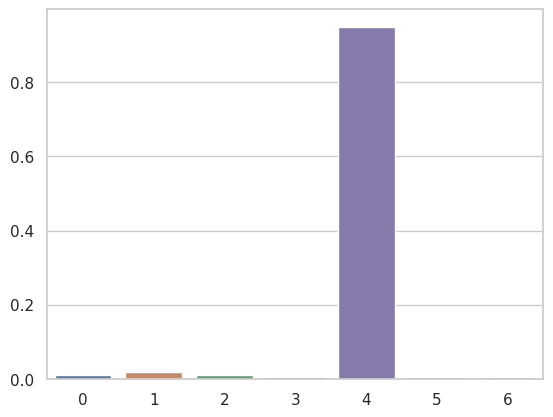

In [ ]:
import seaborn as sns
import numpy as np
sample = 9
sns.set_theme(style="whitegrid")
print(model(data.x, data.edge_index).shape)
pred = model(data.x, data.edge_index)
sns.barplot(x=np.array(range(7)), y=pred[sample].detach().cpu().numpy())

In [ ]:
print(torch.transpose(P_0,0,1)@theta_c@P_0)

tensor([[ 5.1135e-03,  2.4580e-04,  7.2150e-04,  ..., -1.7122e-03,
         -5.9969e-04,  2.9179e-03],
        [ 1.7775e-03,  1.0133e-02, -5.7873e-04,  ..., -1.7185e-05,
         -1.0004e-03,  8.7596e-04],
        [-2.9335e-03, -1.1383e-02,  3.5971e-02,  ..., -8.5518e-03,
         -3.7830e-03, -1.8682e-03],
        ...,
        [-8.7357e-04,  6.1526e-04, -2.7513e-03,  ...,  7.2234e-03,
          1.4754e-03, -1.0267e-03],
        [-1.1039e-04, -5.8109e-04, -8.4393e-04,  ...,  1.5217e-03,
          9.8887e-04, -6.5743e-04],
        [ 3.2877e-03, -8.4101e-04,  3.9976e-03,  ..., -2.1741e-03,
         -1.2113e-03,  7.7653e-03]])


In [ ]:
print(theta)

tensor([[5., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [ ]:
# U_t_1, S_t_1, V_t_1 = torch.svd(theta) #original feature matrix
U_1, S_1, V_1 = torch.svd(torch.transpose(P_0,0,1)@theta_c@P_0) #decoarsened feature matrix

U_t_1, S_t_1, V_t_1 = torch.svd(theta) #original feature matrix

S_1 = (S_1-S_1.mean())/(S_1.max())
S_t_1 = (S_t_1-S_t_1.mean())/(S_t_1.max())

TypeError: ignored

In [ ]:
eigenvalues = np.linalg.eigvals(theta)

In [ ]:
S_t_1 = np.sort(np.abs(eigenvalues[:]))[::-1]

NameError: ignored

In [ ]:
S_t_1 = (S_t_1-S_t_1.mean())/(S_t_1.max())

In [ ]:
getREE(S_1,S_t_1)

39064.1171875

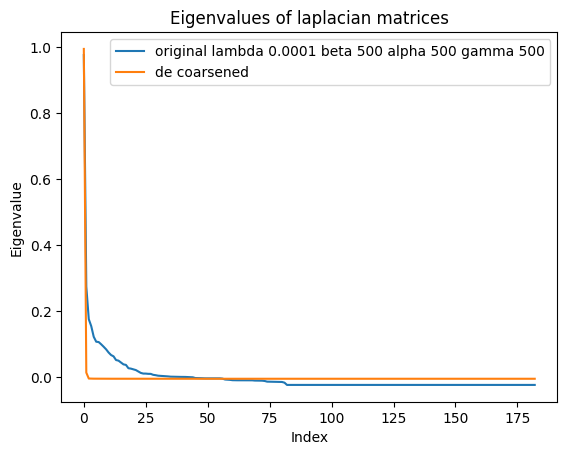

In [ ]:
import matplotlib.pyplot as plt
# Plot the top 100 eigenvalues of both the SVDs
plt.plot(range(len(S_t_1)), S_t_1[:], label='original'  + " lambda " + str(lambda_param_min)+" beta " + str(beta_param_min)+" alpha "+str(alpha_param_min)+" gamma "+str(gamma_param_min))
plt.plot(range(len(S_t_1)), S_1[:], label='de coarsened')
# plt.plot(range(91), S_t_1[:91], label='coarsened')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')

plt.title('Eigenvalues of laplacian matrices')
plt.legend()
plt.show()


In [ ]:
len(S_1)

2703

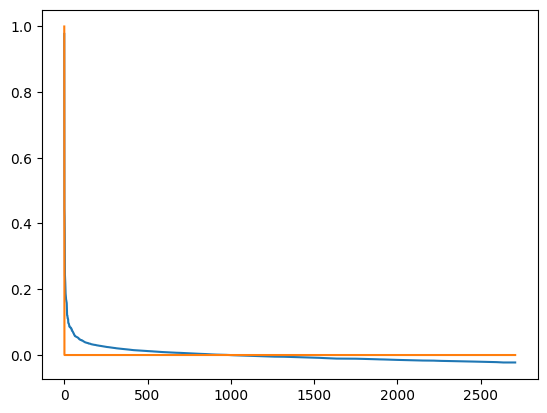

In [ ]:
plt.plot(range(len(S_t_1)), S_t_1[:], label='original'  + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
plt.plot(range(len(S_1)), S_1[:], label='original'  + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))

In [ ]:
torch.svd(torch.transpose(P_0,0,1)@theta_c@P_0)

torch.return_types.svd(
U=tensor([[-0.0189, -0.0086, -0.0088,  ...,  0.0046,  0.0040, -0.0056],
        [-0.0193, -0.0076,  0.0008,  ...,  0.0088, -0.0018, -0.0067],
        [-0.0175, -0.0071, -0.0065,  ...,  0.0048,  0.0091, -0.0035],
        ...,
        [ 0.0113, -0.0388, -0.0421,  ...,  0.0087, -0.0090,  0.0050],
        [-0.0163, -0.0123,  0.0106,  ...,  0.0113,  0.0146, -0.0124],
        [-0.0122, -0.0267,  0.0046,  ..., -0.0503,  0.0407, -0.0049]]),
S=tensor([5.7777e+00, 3.0612e-01, 4.3040e-03,  ..., 1.7555e-08, 1.0455e-08,
        3.6098e-09]),
V=tensor([[-0.0189, -0.0086, -0.0088,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0193, -0.0076,  0.0007,  ..., -0.0007,  0.0006,  0.0006],
        [-0.0175, -0.0071, -0.0065,  ...,  0.0109, -0.0127, -0.0145],
        ...,
        [ 0.0113, -0.0388, -0.0421,  ..., -0.0229, -0.0279, -0.0118],
        [-0.0163, -0.0123,  0.0106,  ..., -0.0123,  0.0055,  0.0114],
        [-0.0122, -0.0267,  0.0046,  ..., -0.0098, -0.0101,  0.0014]]))

In [ ]:
U_t_1, S_t_1, V_t_1 = torch.svd(theta) #original feature matrix
# U_1, S_1, V_1 = torch.svd(torch.transpose(P_0,0,1)@theta_c@P_0) #decoarsened feature matrix

_LinAlgError: ignored

In [ ]:
l0_norm = np.count_nonzero(theta)
print(l0_norm)

13264


In [ ]:
# Get the maximum value
max_value = np.max(theta, axis =0)

print("Maximum value:", max_value)


TypeError: ignored

In [ ]:
# Reshape the tensor into a matrix
matrix = theta.reshape(theta.shape[0], -1)

# Compute the eigenvalues of the matrix
eigenvalues = np.linalg.eigvals(matrix)

print("Eigenvalues:", (np.abs(eigenvalues[8:108])))

Eigenvalues: [100.04485    52.039223   36.306744   35.204075   31.46815    30.535675
  29.278156   27.724566   24.586914   24.221756   22.589943   22.836136
  22.155233   21.019348   20.778603   20.677284   19.522089   18.957264
  18.72288    18.094923   18.012978   17.983418   17.634626   17.730476
  17.38071    17.13838    17.09549    16.994778   16.652262   16.461586
  16.447739   16.352432   16.247898   16.13197    16.086672   16.05102
  15.883774   15.581944   15.386819   15.414569   15.021964   14.576668
  14.423395   14.313269   14.173994   13.986881   13.8917055  13.698833
  13.498093   13.38694    13.265742   13.236895   13.158797   13.154574
  13.07437    13.050374   13.039609   12.806557   12.708285   12.654259
  12.604245   12.420997   12.3838625  12.380384   12.373646   12.220299
  12.328621   12.302326   12.127377   12.140332   12.138116   12.066971
  11.990549   12.056841   11.775917   11.717916   11.677184   11.686904
  12.         12.048107   11.648285   11.598378   11

In [ ]:
S_t_1 = (np.abs(eigenvalues[8:108])-np.abs(eigenvalues[8:108]).mean())/(np.abs(eigenvalues[8:108]).max())

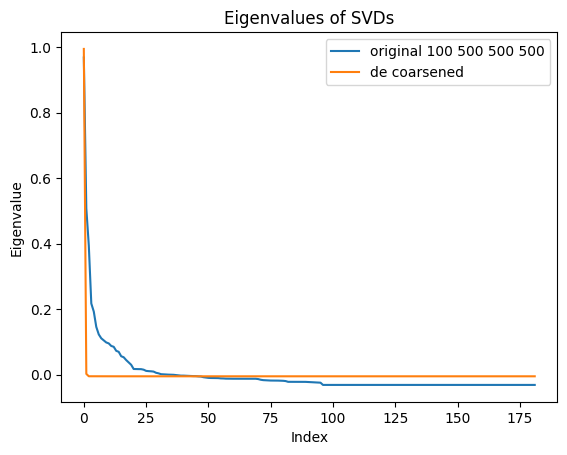

In [ ]:
import matplotlib.pyplot as plt
# Plot the top 100 eigenvalues of both the SVDs
plt.plot(range(182), S_t_1[:182], label='original'  + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
plt.plot(range(182), S_1[:182], label='de coarsened')
# plt.plot(range(91), S_t_1[:91], label='coarsened')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of SVDs')
plt.legend()
plt.show()

In [ ]:
# Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)
print(sorted_eigenvalues[:10])

# # Select the top 100 eigenvalues
# top_100_eigenvalues = sorted_eigenvalues[:100]

# # Calculate the multiplication of the top 100 eigenvalues
# multiplication = np.prod(np.abs(top_100_eigenvalues))

# print("Multiplication of top 100 eigenvalues:", multiplication)

[-6.5294623e-15+0.0000000e+00j -3.6549044e-15+0.0000000e+00j
 -2.0970653e-15-9.8757011e-16j -2.0970653e-15+9.8757011e-16j
 -2.0711995e-15-4.2240306e-17j -2.0711995e-15+4.2240306e-17j
 -1.8603048e-15+0.0000000e+00j -1.4927085e-15+0.0000000e+00j
 -1.3435759e-15+0.0000000e+00j -1.2897085e-15+0.0000000e+00j]


In [ ]:
theta.shape

torch.Size([2708, 2708])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# create a sample graph
# G = nx.Graph()
# G.add_nodes_from([1, 2, 3, 4, 5])
# G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# plot the graph
pos = nx.spring_layout(dataset)  # position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw_networkx_nodes(dataset, pos, node_color='r', node_size=500)
nx.draw_networkx_edges(dataset, pos, edge_color='b', width=2)
nx.draw_networkx_labels(dataset, pos, font_size=12, font_family='sans-serif')
plt.axis('off')
plt.show()

ValueError: ignored

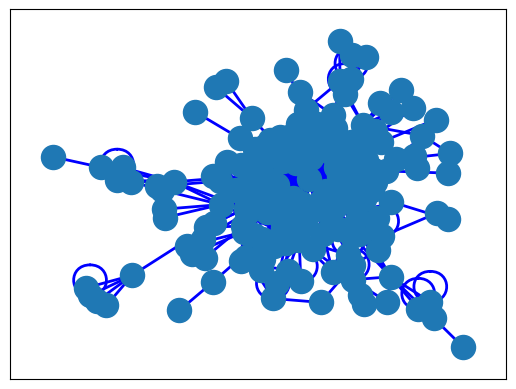

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import WebKB

# Load the WebKB Texas dataset
dataset = WebKB(root='/Texas', name='Texas')

# Get the graph data from the dataset
data = dataset[0]

# Extract the necessary information for plotting
edge_index = data.edge_index
# Additional node or edge attributes can be accessed from data.x or data.edge_attr, if available

# Create a NetworkX graph object
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edge_index.t().tolist())

# Plot the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, edge_color='b', width=2)
plt.show()


In [ ]:
import torch
from torch_geometric.datasets import MNIST
from torch_geometric.transforms import ToSparseTensor
from torch_geometric.nn import GCNConv

# Load MNIST dataset
dataset = MNIST(root='path_to_dataset', download=True, transform=ToSparseTensor())

# Extract node features (pixel intensities) and labels
features = dataset.data.view(-1, 1).float() / 255.0  # Normalize pixel intensities to [0, 1]
labels = dataset.targets

# Create adjacency matrix (assuming a fully connected graph)
num_nodes = features.size(0)
edge_index = torch.tensor([(i, j) for i in range(num_nodes) for j in range(num_nodes)], dtype=torch.long).t()

# Define graph convolutional network (GCN) model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Set model parameters
input_dim = 1  # Input feature dimension (pixel intensity)
hidden_dim = 64  # Hidden dimension in GCN layers
output_dim = 16  # Output dimension (number of classes or desired feature dimension)

# Initialize model
model = GCN(input_dim, hidden_dim, output_dim)

# Perform forward pass to obtain node representations (feature matrix)
feature_matrix = model(features, edge_index)


ImportError: ignored

In [ ]:
L =theta_c

In [ ]:
L = L.numpy()

In [ ]:
C_0_new=np.zeros(P_0.shape)
for i in range(P_0.shape[0]):
    C_0_new[i][np.argmax(P_0[i])]=1
# print(C_0_new)
# C_0_new=C_0
from scipy import sparse
#Lc=C_0.T@L@C_0
Lc=C_0_new.T@L@C_0_new
print("L:", Lc.shape)
# Lc=L_new
#print(Lc)
Wc=(-1*Lc)*(1-np.eye(Lc.shape[0]))
print("W:", Wc.shape)
Wc[Wc<0.1]=0
Wc=sparse.csr_matrix(Wc)
Wc = Wc.tocoo()
row = torch.from_numpy(Wc.row).to(torch.long)
col = torch.from_numpy(Wc.col).to(torch.long)
edge_index_coarsen2 = torch.stack([row, col], dim=0).float()
print("edgedecoarsen:", edge_index_coarsen2.shape)
edge_weight = torch.from_numpy(Wc.data)
print("edgeweight:", edge_weight.shape)


L: (251, 251)
W: (251, 251)
edgedecoarsen: torch.Size([2, 512])
edgeweight: torch.Size([512])


In [ ]:
L =theta
L = L.numpy()

In [ ]:
C_0_new=np.zeros(C_0.shape)
for i in range(C_0.shape[0]):
    C_0_new[i][np.argmax(C_0[i])]=1
# print(C_0_new)
# C_0_new=C_0
from scipy import sparse
#Lc=C_0.T@L@C_0
Lc=C_0_new.T@L@C_0_new
print("L:", Lc.shape)
# Lc=L_new
#print(Lc)
Wc=(-1*Lc)*(1-np.eye(Lc.shape[0]))
print("W:", Wc.shape)
Wc[Wc<0.1]=0
Wc=sparse.csr_matrix(Wc)
Wc = Wc.tocoo()
row = torch.from_numpy(Wc.row).to(torch.long)
col = torch.from_numpy(Wc.col).to(torch.long)
edge_index_coarsen2 = torch.stack([row, col], dim=0)
print("edgecoarsen:", edge_index_coarsen2.shape)
edge_weight = torch.from_numpy(Wc.data)
print("edgeweight:", edge_weight.shape)


L: (146, 146)
W: (146, 146)
edgecoarsen: torch.Size([2, 61])
edgeweight: torch.Size([61])


In [ ]:
data.edge_index.shape

torch.Size([2, 515])

In [ ]:
edge_index_coarsen2.shape

torch.Size([2, 67])

In [ ]:
norm = torch.norm(edge_index_coarsen2 - data.edge_index[:,:512], p='fro')

In [ ]:
print(norm)

tensor(2382.5144)


In [ ]:
edge_index_coarsen2

tensor([[  1.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,  17.,  17.,  17.,  23.,
          26.,  26.,  26.,  26.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
          30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  31.,  31.,
          31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  38.,  38.,  38.,  38.,
          38.,  38.,  38.,  38.,  38.,  38.,  40.,  40.,  40.,  43.,  43.,  43.,
          44.,  52.,  52.,  52.,  52.,  52.,  52.,  52.,  52.,  52.,  52.,  52.,
          52.,  55.,  55.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,
          59.,  62.,  62.,  62.,  62.,  62.,  62.,  62.,  62.,  63.,  63.,  66.,
          66.,  66.,  66.,  66.,  66.,  66.,  66.,  66.,  77.,  77.,  77.,  79.,
          88.,  88.,  88.,  88.,  88.,  88.,  92.,  92.,  96.,  96.,  98.,  98.,
          98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98., 104., 104.,
         106., 107., 107., 107., 107., 107., 107., 107., 107., 107., 107., 108.,
         108., 110., 114., 1

In [ ]:
data.edge_index

tensor([[  0,   0,   1,   2,   2,   6,   6,   8,   8,   8,   8,   8,   9,  10,
          10,  10,  10,  12,  13,  18,  19,  20,  20,  20,  20,  20,  21,  21,
          21,  21,  22,  22,  24,  24,  24,  24,  24,  24,  24,  25,  25,  27,
          27,  27,  28,  28,  29,  31,  33,  35,  41,  41,  42,  43,  48,  48,
          52,  53,  53,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,
          57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,
          57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,
          57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,
          57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,
          57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,
          57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  57,  62,  62,
          63,  64,  65,  65,  66,  66,  66,  66,  66,  66,  66,  66,  66,  67,
          67,  67,  67,  67,  67,  67,  67,  69,  70

In [ ]:
def count_matching_edges(edge_index1, edge_index2):
    set1 = set(map(tuple, edge_index1.t().tolist()))
    set2 = set(map(tuple, edge_index2.t().tolist()))
    matching_pairs = set1.intersection(set2)
    return set1,set2


In [ ]:
count_matching_edges(edge_index_coarsen2,data.edge_index)

({(4.0, 8.0),
  (4.0, 25.0),
  (4.0, 33.0),
  (4.0, 36.0),
  (4.0, 37.0),
  (4.0, 45.0),
  (4.0, 55.0),
  (4.0, 90.0),
  (4.0, 117.0),
  (4.0, 163.0),
  (4.0, 166.0),
  (4.0, 196.0),
  (4.0, 250.0),
  (8.0, 4.0),
  (8.0, 17.0),
  (8.0, 26.0),
  (8.0, 33.0),
  (8.0, 37.0),
  (8.0, 45.0),
  (8.0, 46.0),
  (8.0, 99.0),
  (8.0, 100.0),
  (8.0, 141.0),
  (8.0, 144.0),
  (8.0, 162.0),
  (8.0, 178.0),
  (8.0, 189.0),
  (8.0, 196.0),
  (8.0, 198.0),
  (8.0, 211.0),
  (8.0, 218.0),
  (19.0, 4.0),
  (19.0, 26.0),
  (19.0, 45.0),
  (19.0, 141.0),
  (19.0, 144.0),
  (19.0, 149.0),
  (19.0, 189.0),
  (19.0, 198.0),
  (19.0, 211.0),
  (23.0, 4.0),
  (23.0, 45.0),
  (23.0, 144.0),
  (23.0, 178.0),
  (23.0, 189.0),
  (23.0, 197.0),
  (25.0, 4.0),
  (25.0, 26.0),
  (25.0, 33.0),
  (25.0, 45.0),
  (25.0, 46.0),
  (25.0, 90.0),
  (25.0, 99.0),
  (25.0, 117.0),
  (25.0, 141.0),
  (25.0, 144.0),
  (25.0, 189.0),
  (25.0, 196.0),
  (25.0, 197.0),
  (25.0, 211.0),
  (25.0, 218.0),
  (26.0, 8.0),
  (26.0, 25.

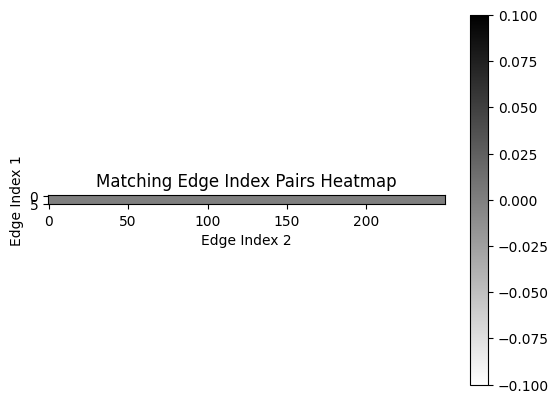

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_matching_edges_heatmap(edge_index1, edge_index2):
    set1 = set(map(tuple, edge_index1.t().tolist()))
    set2 = set(map(tuple, edge_index2.t().tolist()))

    intersection = set1.intersection(set2)

    matrix = np.zeros((edge_index1.max().item()+1, edge_index2.max().item()+1))

    for pair in intersection:
        matrix[pair[0], pair[1]] = 1

    plt.imshow(matrix, cmap='binary')
    plt.xlabel('Edge Index 2')
    plt.ylabel('Edge Index 1')
    plt.title('Matching Edge Index Pairs Heatmap')
    plt.colorbar()
    plt.show()

# Example usage
# edge_index_coarsen1 = torch.tensor([[0, 1, 2], [3, 4, 5]])
# edge_index_coarsen2 = torch.tensor([[1, 2, 0], [4, 3, 5]])

plot_matching_edges_heatmap(edge_index_coarsen2, data.edge_index[:,:512])


In [ ]:
X_tilde = random(k, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
C = random(p, k, density=0.15, random_state=1, data_rvs=temp2.rvs)

# try:

X_t_0,C_0 = experiment(lambda_param,beta_param,alpha_param,gamma_param,C,X_tilde,theta,X)
L = theta


Xd = random(p, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
P = random(k, p, density=0.15, random_state=1, data_rvs=temp2.rvs)
X_tilde = X_t_0
theta_c = torch.transpose(C_0,0,1)@theta@C_0
# print(type(X_t_0))
Xd = convertScipyToTensor(Xd)
Xd = Xd.to_dense()
P = convertScipyToTensor(P)
P = P.to_dense()
X_0,P_0 = liftedexperiment(lambda_param,beta_param,alpha_param,gamma_param,P,Xd,theta_c,X_tilde)
L = theta_c


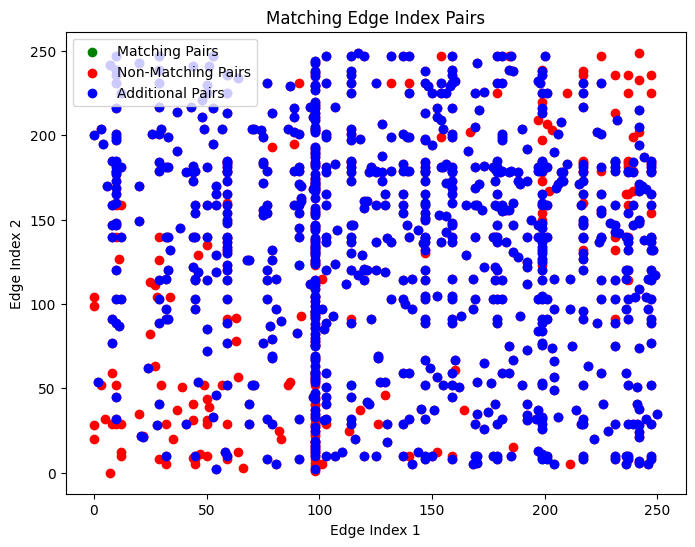

In [ ]:
import matplotlib.pyplot as plt

def plot_matching_edges(edge_index1, edge_index2):
    pairs1 = set(map(tuple, edge_index1.t().tolist()))
    pairs2 = set(map(tuple, edge_index2.t().tolist()))

    matching_pairs = pairs1.intersection(pairs2)
    non_matching_pairs = pairs1.symmetric_difference(pairs2)

    # Additional pairs with a sum difference less than 10
    additional_pairs = set()
    for pair1 in pairs1:
        for pair2 in pairs2:
            if (abs(sum(pair1) - sum(pair2)) < 2) and (abs(sum(pair1) - sum(pair2))!=0):
                additional_pairs.add(pair1)
                additional_pairs.add(pair2)


    x_match, y_match = zip(*matching_pairs) if matching_pairs else ([], [])
    x_non_match, y_non_match = zip(*non_matching_pairs) if non_matching_pairs else ([], [])
    x_additional, y_additional = zip(*additional_pairs) if additional_pairs else ([], [])
    plt.figure(figsize=(8, 6))
    # plt.scatter(*zip(*matching_pairs), color='green', label='Matching Pairs')
    # plt.scatter(*zip(*non_matching_pairs), color='red', label='Non-Matching Pairs')
    # plt.scatter(*zip(*additional_pairs), color='blue', label='Additional Pairs')
    plt.scatter(x_match, y_match, color='green', label='Matching Pairs')
    plt.scatter(x_non_match, y_non_match, color='red', label='Non-Matching Pairs')
    plt.scatter(x_additional, y_additional, color='blue', label='Additional Pairs')

    plt.xlabel('Edge Index 1')
    plt.ylabel('Edge Index 2')
    plt.legend()
    plt.title('Matching Edge Index Pairs')
    plt.show()

# # Example usage
# edge_index_coarsen1 = torch.tensor([[0, 1, 2], [3, 4, 5]])
# edge_index_coarsen2 = torch.tensor([[1, 2, 0], [4, 3, 5]])

plot_matching_edges(edge_index_coarsen2, data.edge_index)


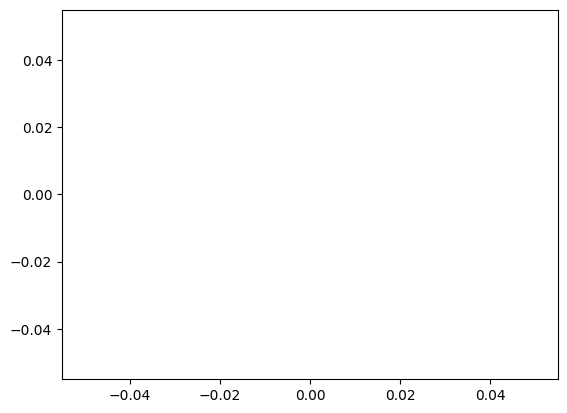

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Assuming you have a list of edge indices called 'edge_indices'
edge_indices = set(map(tuple, edge_index_coarsen2.t().tolist()))
edge_indices = list(edge_indices)


# Create a figure and axis
fig, ax = plt.subplots()

# # Set the x and y limits of the plot
# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

# Initialize an empty line object
line, = ax.plot([], [], 'o-', color='blue')

# Function to update the plot with each edge index
def update_plot(index):
    x_data = [edge_indices[i][0] for i in range(index+1)]
    y_data = [edge_indices[i][1] for i in range(index+1)]
    line.set_data(x_data, y_data)
    return line,

# Create an animation
animation = FuncAnimation(fig, update_plot, frames=len(edge_indices), interval=1000, blit=True)

# Show the plot
plt.show()


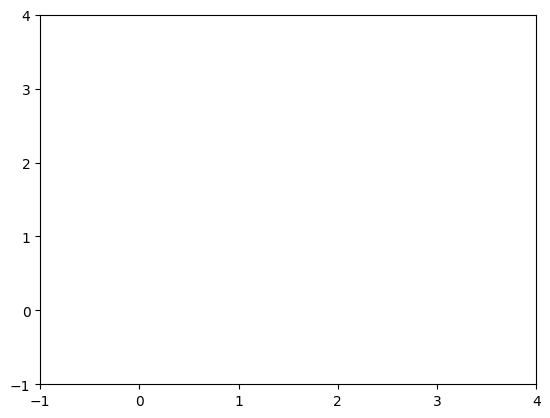

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Assuming you have a list of edge indices called 'edge_indices'
edge_indices = set(map(tuple, edge_index_coarsen2.t().tolist()))
edge_indices = list(edge_indices)


# Create a figure and axis
fig, ax = plt.subplots()

# Set the x and y limits of the plot
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 4)

# Initialize an empty line object
line, = ax.plot([], [], 'o-', color='blue')

# Function to update the plot with each edge index
def update_plot(index):
    x_data = [edge_indices[i][0] for i in range(index+1)]
    y_data = [edge_indices[i][1] for i in range(index+1)]
    line.set_data(x_data, y_data)
    return line,

# Create an animation
animation = FuncAnimation(fig, update_plot, frames=len(edge_indices), interval=1000, blit=True)

# Show the plot
plt.show()


ValueError: ignored

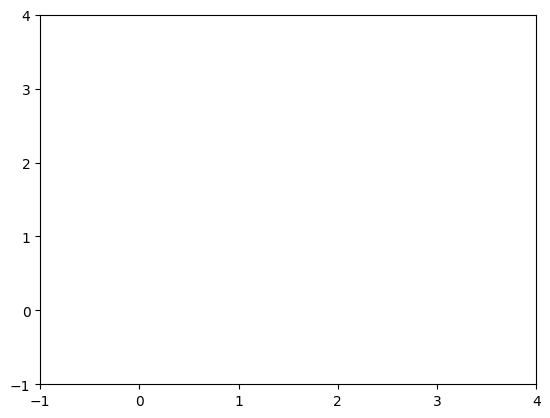

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection

# Assuming you have a list of edge indices called 'edge_indices'
edge_indices = set(map(tuple, edge_index_coarsen2.t().tolist()))
edge_indices = list(edge_indices)

# Create a figure and axis
fig, ax = plt.subplots()

# Set the x and y limits of the plot
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 4)

# Create an empty LineCollection
lines = LineCollection([], color='blue')

# Add the LineCollection to the plot
ax.add_collection(lines)

def update_plot(index):
    segments = np.array(edge_indices[:index+1])
    lines.set_segments(segments.reshape(-1, 2, 2))
    return lines,
# Create an animation
animation = FuncAnimation(fig, update_plot, frames=len(edge_indices), interval=1000, blit=True, repeat=False)

# Show the plot
plt.show()


In [ ]:
len(edge_indices)

61

In [ ]:
L = theta
L = L.numpy()
X_0 = X

In [ ]:
import numpy as np
from scipy.sparse import csgraph

# Assuming you have the Laplacian matrix stored in 'L'
# Calculate the degrees of the vertices
degrees = np.sum(L, axis=1)

# Construct the diagonal matrix of degrees
D = np.diag(degrees)

# Calculate the adjacency matrix
A = D - L


In [ ]:
A = torch.tensor(A)
X_0= torch.tensor(X_0)


<ipython-input-30-44a441afef0e>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_0= torch.tensor(X_0)


In [ ]:
import torch
import torch.nn as nn

class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, adj, features):
        support = self.linear(features)
        output = torch.spmm(adj, support)
        return output

class EdgePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(EdgePredictor, self).__init__()
        self.gcl1 = GraphConvolution(input_dim, hidden_dim)
        # print(self.gcl1.shape)
        self.gcl2 = GraphConvolution(hidden_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, 1)

    def forward(self, adj, features):
        hidden = self.gcl1(adj, features)
        hidden = torch.relu(hidden)
        hidden = self.gcl2(adj, hidden)
        output = self.decoder(hidden)
        return torch.sigmoid(output)

# Example usage
adjacency_matrix = A  # Your adjacency matrix (A) as a torch.Tensor
feature_matrix = X_0  # Your feature matrix (X) as a torch.Tensor

input_dim = feature_matrix.size(1)
hidden_dim = 64

# Create the edge predictor model
edge_predictor = EdgePredictor(input_dim, hidden_dim)

# Calculate the edge probability matrix
M = edge_predictor(adjacency_matrix, feature_matrix)

print(M)


tensor([[0.4318],
        [0.5037],
        [0.5215],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.5501],
        [0.5226],
        [0.5328],
        [0.5229],
        [0.5054],
        [0.5226],
        [0.5218],
        [0.5234],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.4925],
        [0.5182],
        [0.3874],
        [0.5747],
        [0.5119],
        [0.5226],
        [0.4658],
        [0.5159],
        [0.5226],
        [0.5745],
        [0.4880],
        [0.5125],
        [0.5226],
        [0.5295],
        [0.5226],
        [0.5202],
        [0.5226],
        [0.5199],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.5245],
        [0.5304],
        [0.5053],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.5643],
        [0.5226],
        [0.5226],
        [0.5226],
        [0.5436],
        [0.4897],
        [0.5226],
        [0

In [ ]:
X_0.shape

torch.Size([251, 1703])

In [ ]:
print(L)

[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GraphConvolution(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolution, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, adjacency, X):
        hidden = self.linear(torch.matmul(adjacency, X))
        output = F.relu(hidden)
        return output

class GraphEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphEncoder, self).__init__()
        self.gc1 = GraphConvolution(input_dim, hidden_dim)
        self.gc2 = GraphConvolution(hidden_dim, output_dim)

    def forward(self, adjacency, X):
        print("Input X shape:", X.shape)
        hidden = self.gc1(adjacency, X)
        print("Hidden shape:", hidden.shape)
        output = self.gc2(adjacency, hidden)
        print("Output shape:", output.shape)
        return output

# Assuming you have Laplacian matrix 'L' with shape 183x183
L = L

# Assuming you have feature matrix 'X' with shape 183x1703
X = X_0

# Create the model
model = GraphEncoder(input_dim=X_0.shape[1], hidden_dim=64, output_dim=X_0.shape[0])

# Calculate adjacency matrix
adjacency = torch.eye(L.shape[0]) - L

# Forward pass
Z = model.forward(A, X)
M = torch.sigmoid(torch.matmul(Z, Z.t()))

print("Shape of M:", M.shape)


Input X shape: torch.Size([183, 1703])
Hidden shape: torch.Size([183, 64])
Output shape: torch.Size([183, 183])
Shape of M: torch.Size([183, 183])


In [ ]:
X.shape

torch.Size([183, 1703])

In [ ]:
l0_norm = np.count_nonzero(adj)

# Print the L0 norm
print(l0_norm)

515


In [ ]:
# Set the print options to display the complete matrix
np.set_printoptions(threshold=np.inf)

# Print the complete matrix
print(M)

tensor([[1.0000, 0.9838, 1.0000,  ..., 0.9991, 0.9873, 0.9942],
        [0.9838, 0.6696, 0.8981,  ..., 0.6734, 0.6577, 0.7232],
        [1.0000, 0.8981, 1.0000,  ..., 0.9114, 0.9456, 0.9808],
        ...,
        [0.9991, 0.6734, 0.9114,  ..., 0.7587, 0.6674, 0.7130],
        [0.9873, 0.6577, 0.9456,  ..., 0.6674, 0.7650, 0.7106],
        [0.9942, 0.7232, 0.9808,  ..., 0.7130, 0.7106, 0.9657]],
       grad_fn=<SigmoidBackward0>)


In [ ]:
type(A)

torch.Tensor

In [ ]:
type(X_0)

numpy.ndarray

In [ ]:
import numpy as np

# Assuming you have the M matrix and adjacency matrix A

threshold = 0.0084
try:
    normalized_M = normalized_M.cpu().detach().numpy()
except:
    normalized_M = normalized_M
# Initialize an adjacency matrix A_new with zeros
adj_new  = adj
# Iterate through each element of M
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        # Check if probability is greater than the threshold
        if normalized_M[i, j] > threshold and i!=j:
            # Set corresponding entry in A_new to 1
            adj_new[i, j] = 1
            adj_new[j, i] = 1  # Ensure symmetry

# Display the resulting adjacency matrix
print(adj_new)


tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
adj_new.shape

torch.Size([183, 183])

In [ ]:
A_new = torch.tensor(A_new)

In [ ]:
A_new@theta

tensor([[ 2., -2.,  0.,  ..., -1., -1., -1.],
        [ 2., -1.,  0.,  ..., -1., -1., -1.],
        [ 0., -3.,  2.,  ..., -1., -1., -1.],
        ...,
        [ 0., -2.,  0.,  ..., -1., -1., -1.],
        [ 0., -1.,  0.,  ..., -1., -1., -1.],
        [ 0., -1.,  0.,  ..., -1., -1., -1.]])

In [ ]:
import numpy as np

def tensor_row_normalize(tensor):
    # Get the shape of the tensor
    tensor_shape = tensor.shape

    # Reshape the tensor to a 2D matrix with the last dimension as rows
    reshaped_tensor = np.reshape(tensor.detach().numpy(), (tensor_shape[:-1] + (-1,)))

    # Compute row sums along the last dimension
    row_sums = np.sum(reshaped_tensor, axis=-1)

    # Reshape the row sums to match the shape of the tensor
    row_sums = np.reshape(row_sums, tensor_shape[:-1] + (1,))

    # Perform row-wise normalization
    normalized_tensor = reshaped_tensor / row_sums


    return normalized_tensor

# Example usage
# T = np.array([[[0.2, 0.3, 0.5],
#                [0.1, 0.4, 0.5],
#                [0.3, 0.3, 0.4]],

#               [[0.5, 0.2, 0.3],
#                [0.4, 0.1, 0.5],
#                [0.6, 0.2, 0.2]]])

normalized_M = tensor_row_normalize(M)

print(normalized_M)


[[0.006831   0.00633591 0.00582184 ... 0.00530365 0.0049974  0.0049974 ]
 [0.00720855 0.00745474 0.0056651  ... 0.0049174  0.004901   0.004901  ]
 [0.00645842 0.00552376 0.00736843 ... 0.00563998 0.00475513 0.00475513]
 ...
 [0.00614901 0.00501104 0.00589444 ... 0.00594606 0.00491216 0.00491216]
 [0.00618137 0.00532827 0.00530197 ... 0.00524062 0.0050731  0.0050731 ]
 [0.00618137 0.00532827 0.00530197 ... 0.00524062 0.0050731  0.0050731 ]]


In [ ]:
normalized_M= torch.tensor(normalized_M)


<ipython-input-60-3281b8665dab>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_M= torch.tensor(normalized_M)


In [ ]:
normalized_M@theta

tensor([[ 8.3133e-05, -8.3063e-05,  6.9263e-05,  ..., -1.1576e-05,
         -7.2107e-05, -4.1567e-05],
        [ 7.9479e-05, -6.6044e-05,  5.9417e-05,  ..., -1.4132e-05,
         -6.8870e-05, -4.1567e-05],
        [ 6.9263e-05, -8.7702e-05,  7.3961e-05,  ..., -1.4766e-05,
         -6.9634e-05, -4.1567e-05],
        ...,
        [ 5.9977e-05, -8.4795e-05,  5.3516e-05,  ..., -1.2893e-05,
         -6.8141e-05, -4.1567e-05],
        [ 6.3025e-05, -7.7792e-05,  5.2050e-05,  ..., -1.4096e-05,
         -6.7411e-05, -4.1567e-05],
        [ 6.3025e-05, -7.7792e-05,  5.2050e-05,  ..., -1.4096e-05,
         -6.7411e-05, -4.1567e-05]])

In [ ]:
theta

tensor([[2., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 2.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
# Example adjacency matrix
adjacency_matrix = torch.zeros((5, 5))
adjacency_matrix[1, 2] = 1
adjacency_matrix[2, 1] = 1
adjacency_matrix[3, 4] = 1
adjacency_matrix[4, 3] = 1

# Example probability matrix
M = torch.tensor([[0.1, 0.2, 0.3, 0.4, 0.5],
                         [0.6, 0.7, 0.8, 0.9, 1.0],
                         [0.4, 0.3, 0.2, 0.1, 0.0],
                         [0.9, 0.8, 0.7, 0.6, 0.5],
                         [0.5, 0.6, 0.7, 0.8, 0.9]])

In [ ]:
import torch

# Assuming adjacency_matrix and M_matrix are your original matrices

# Step 1: Find the indices of the top 2 highest probabilities in M_matrix
top_indices = torch.argsort(M.flatten(), descending=True)[8:200]
bottom_indices = torch.argsort(M.flatten())[:100]

# Step 2: Get the indices of the top probabilities
row_indices_1 = top_indices // adj.shape[1]
column_indices_1 = top_indices % adj.shape[1]
print(row_indices_1, column_indices_1)

row_indices_2 = bottom_indices // adj.shape[1]
column_indices_2 = bottom_indices % adj.shape[1]
print(row_indices_2, column_indices_2)

# Step 3: Create a new adjacency matrix and set all elements to zero
new_adjacency_matrix = adj.clone()

# Step 4: Set the elements at the identified indices to 1 in the new adjacency matrix
# if new_adjacency_matrix[row_indices_1, column_indices_1] ==0:
new_adjacency_matrix[row_indices_1, column_indices_1] = 1
new_adjacency_matrix[column_indices_1, row_indices_1] = 1


# if new_adjacency_matrix[row_indices_2, column_indices_2] == 1:
new_adjacency_matrix[row_indices_2, column_indices_2] = 0
new_adjacency_matrix[column_indices_2, row_indices_2] = 0



# Print the new adjacency matrix
# print(new_adjacency_matrix)
# print(adjacency_matrix)

tensor([  0,  94,  91,  27,  27,  91,  27,   9,  28,  90,  94,  27,  94,  95,
         95,  95,  27,  27,  95,  27,  96,  96,  96,  27,  96,  85,  87,  87,
         87,  86,  86,  85,  28,  10,  28,  28,  10,  10,  29,  85,  85,  29,
         96,  28,  88,  88,  28,  10,  89,  10,  10,  89,  89,  28,  89,  10,
         90,  10,  98,  18,  25,  25,  99,  99,  25,  25,  99, 100,  98,  97,
         97,  25,  97,  97,  97,  97, 100, 101, 101, 101,  25, 101, 101, 101,
          8, 101,   8,  50, 101,  18, 101,   9,  96,  27,  96,  96,  27,  96,
         96,  27,  96,  96,  97,  97,  97,  97,  97,  85,  97,  97,  97,  97,
          9,  97,  97,  97,   9,  97,  26,  97,  26,  97,  25,  83,  83,  83,
         83,  83,  83,  83,  83,  83,  83,  83,  83,  83,  83,  83,  83,  83,
         83,  11,  83,  83,  11,  83,  83,  83,  83,  83,  83,  83,  83,  83,
         83,  83,  31,  78,  78,  31,  31,  78,  78,  78,  78,  78,  78,  31,
         78,  77,  77,  51,  76,  83,  79,  79,  80,  80,  81,  

In [ ]:
l0_norm = np.count_nonzero(new_adjacency_matrix)

# Print the L0 norm
print(l0_norm)

607


In [ ]:
l0_norm = np.count_nonzero(adj)

# Print the L0 norm
print(l0_norm)

298


In [ ]:
norm_diff = np.count_nonzero(adj - new_adjacency_matrix)

In [ ]:
norm_diff

39

In [ ]:
element_wise_comparison = adj == new_adjacency_matrix
elem = adj==adj

In [ ]:
elem.sum()- element_wise_comparison.sum()

tensor(96)

KeyboardInterrupt: ignored

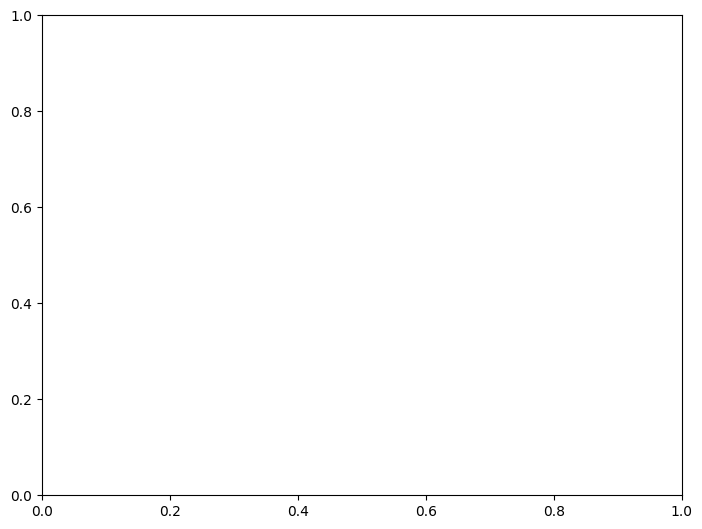

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load and preprocess the image
image = plt.imread('123.jpeg')
# Perform necessary preprocessing steps (e.g., resize, convert to grayscale)

# Create a graph
graph = nx.Graph()

# Add nodes to the graph
height, width = image.shape[:2]
for i in range(height):
    for j in range(width):
        pixel_value = image[i, j]
        graph.add_node((i, j), pixel=pixel_value)

# Connect neighboring pixels to form edges
for i in range(height):
    for j in range(width):
        if i < height - 1:
            graph.add_edge((i, j), (i+1, j))
        if j < width - 1:
            graph.add_edge((i, j), (i, j+1))

# You can further customize the graph construction based on your requirements

# Visualize the graph
nx.draw(graph)
plt.show()
